In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

current_palette = sns.color_palette()
sns.palplot(current_palette)

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

%matplotlib inline


# 1. 의료장비 dataset 준비

In [2]:
data = pd.read_excel('./data/건강보험심사평가원_의료장비 상세 현황 2019.6.xlsx')


In [3]:
df = data

In [4]:
df.shape

(606754, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606754 entries, 0 to 606753
Data columns (total 11 columns):
요양기관명      606754 non-null object
요양기관종별     606754 non-null object
시도         606754 non-null object
시군구        606754 non-null object
장비대분류코드    606754 non-null object
장비대분류명     606754 non-null object
장비세분류코드    606754 non-null object
장비세분류명     606754 non-null object
모델명        606541 non-null object
장비허가번호     606752 non-null object
장비수        606754 non-null int64
dtypes: int64(1), object(10)
memory usage: 50.9+ MB


In [6]:
df.columns


Index(['요양기관명', '요양기관종별', '시도', '시군구', '장비대분류코드', '장비대분류명', '장비세분류코드',
       '장비세분류명', '모델명', '장비허가번호', '장비수'],
      dtype='object')

# 2. 지역별 의료장비 비교

In [7]:
# 필요한 컬럼 갖고 오기
df = data[['시도','장비대분류명','장비수']]


In [8]:
# 시도별 장비(대분류) 수
df_groupby = df.groupby(['시도','장비대분류명']).sum()
df_groupby.head()


장비수
시도  장비대분류명           
강원도 C-Arm형 엑스선장치  159
    가속도맥파기          7
    각막내피세포검사기구     19
    간헐적견인치료기      424
    간헐적양압흡입기       87

In [9]:
# groupby기준을 시도, 장비대분류명으로 하기 위해 index 추가
df_groupby =df_groupby.reset_index(inplace = False)
df.head()

,시도,장비대분류명,장비수
0,서울특별시,치과용방사선촬영장치,1
1,서울특별시,치과방사선파노라마장치,1
2,서울특별시,디지털영상처리장치,1
3,서울특별시,치과근관장측정기,1
4,서울특별시,광중합기,1


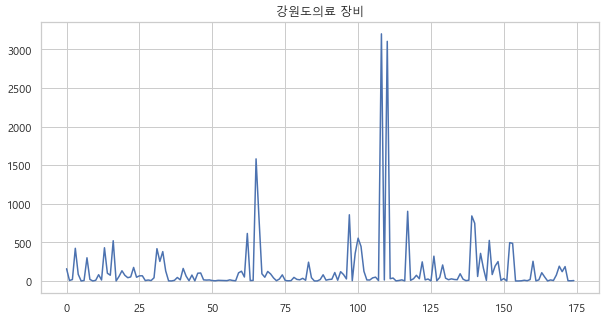

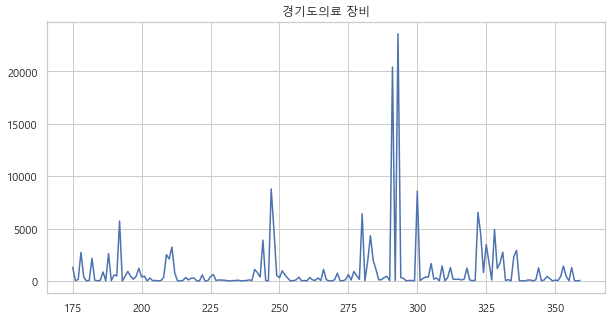

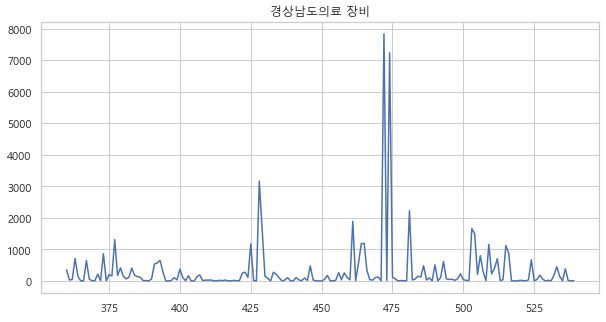

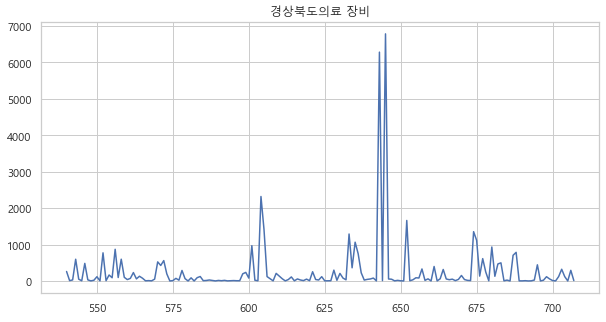

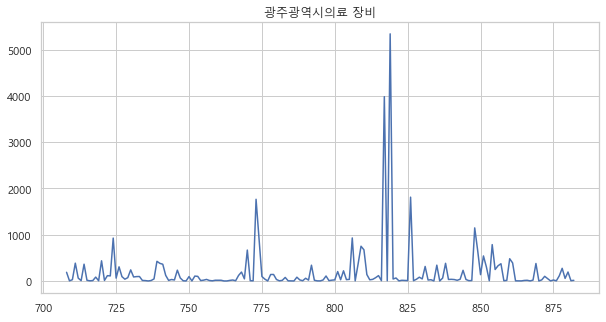

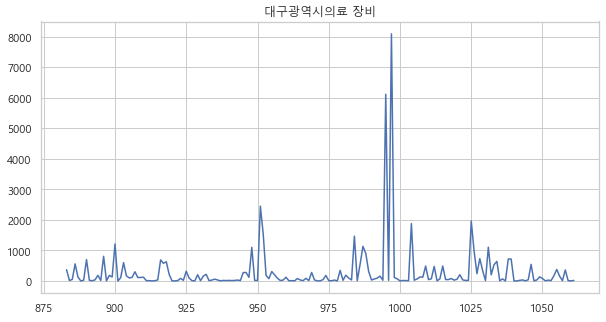

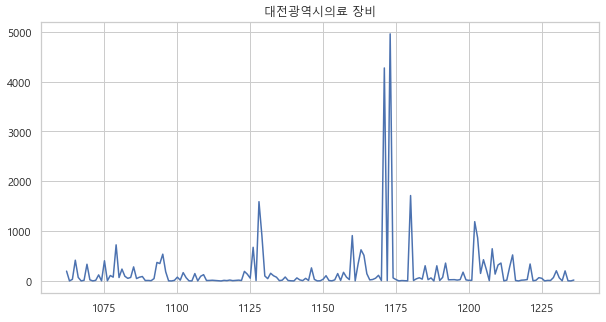

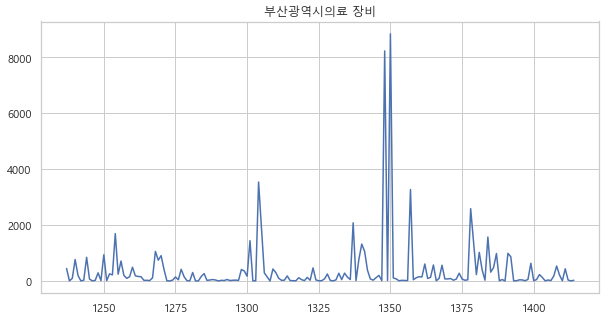

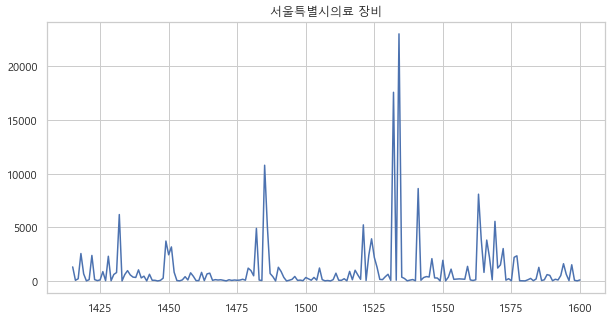

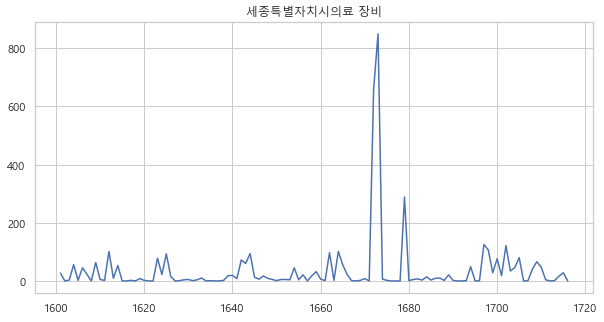

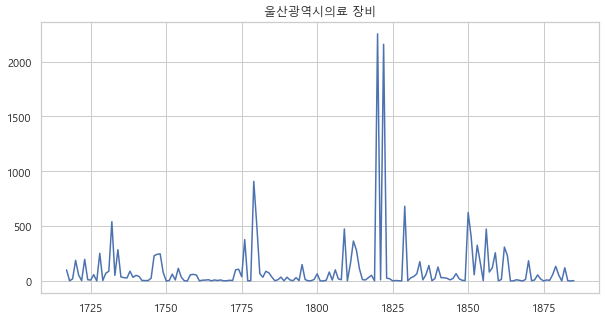

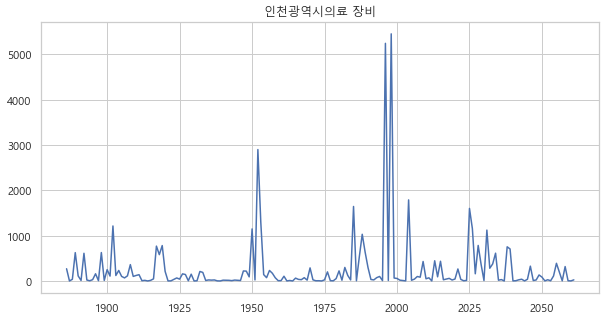

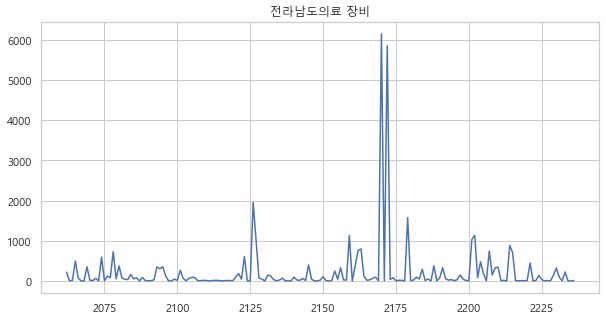

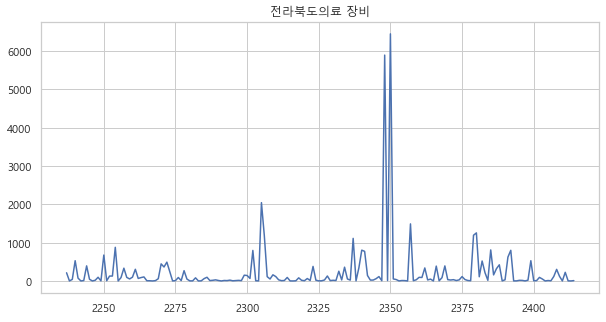

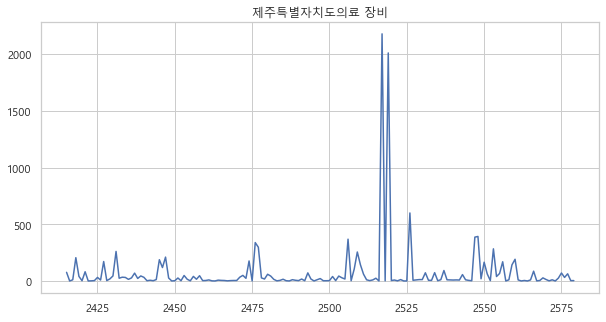

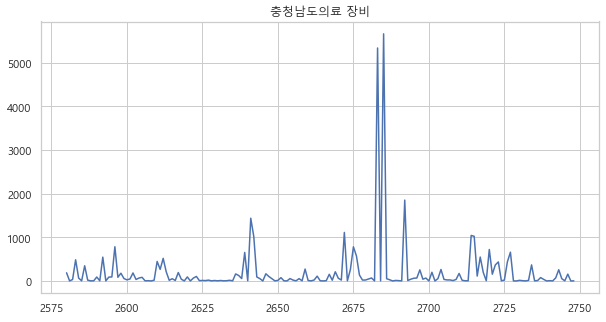

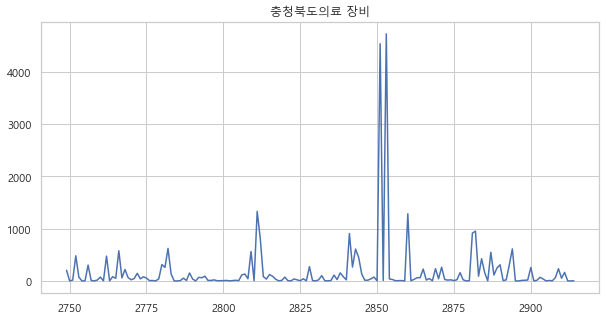

In [10]:
# 지역별 의료 장비 분포 살펴보기
loc_list= pd.unique(df_groupby['시도'])

for i in loc_list:
    plt.figure(figsize = (10,5))
    df_loc =df_groupby[df_groupby['시도']== i]
    df_loc= df_loc.drop('시도', axis = 1)
    plt.plot(df_loc.iloc[:,1])
    plt.title(i+ '의료 장비')
    plt.show()


# 3. 의료 장비별 지역 분포를 히트맵으로 그리기

## 3.1. 전체 의료 장비별 지역 분포 살펴보기

In [11]:
# heatmap으로 그리기 위한 데이터 형태 만들기
df_heatmap = data.groupby(['시도','장비대분류명']).sum().unstack(0).fillna(0)
df_heatmap.head()

장비수                                                            \
시도              강원도     경기도   경상남도   경상북도  광주광역시  대구광역시  대전광역시  부산광역시   서울특별시   
장비대분류명                                                                          
C-Arm형 엑스선장치  159.0  1296.0  356.0  261.0  188.0  368.0  198.0  447.0  1309.0   
가속도맥파기          7.0    31.0   33.0   10.0    4.0   16.0    2.0    3.0    59.0   
각막내피세포검사기구     19.0   135.0   45.0   29.0   28.0   50.0   33.0   93.0   205.0   
간헐적견인치료기      424.0  2726.0  712.0  597.0  385.0  560.0  417.0  768.0  2556.0   
간헐적양압흡입기       87.0   380.0  152.0   49.0   62.0  126.0   72.0  193.0   662.0   

                                                                        
시도           세종특별자치시  울산광역시  인천광역시   전라남도   전라북도 제주특별자치도   충청남도   충청북도  
장비대분류명                                                                  
C-Arm형 엑스선장치    28.0  102.0  270.0  218.0  214.0    77.0  188.0  205.0  
가속도맥파기           1.0    2.0    1.0    3.0    2.0     1.0    2.0    2.0  
각막내피세포검사기구       4.0   20.0   37.0   14.0   41.0    11.0   34.0   17.0  
간헐적견인치료기        57.0  189.0  625.0  494.0  529.0   206.0  486.0  482.0  
간헐적양압흡입기         3.0   54.0  112.0   76.0   75.0    41.0   67.0   75.0

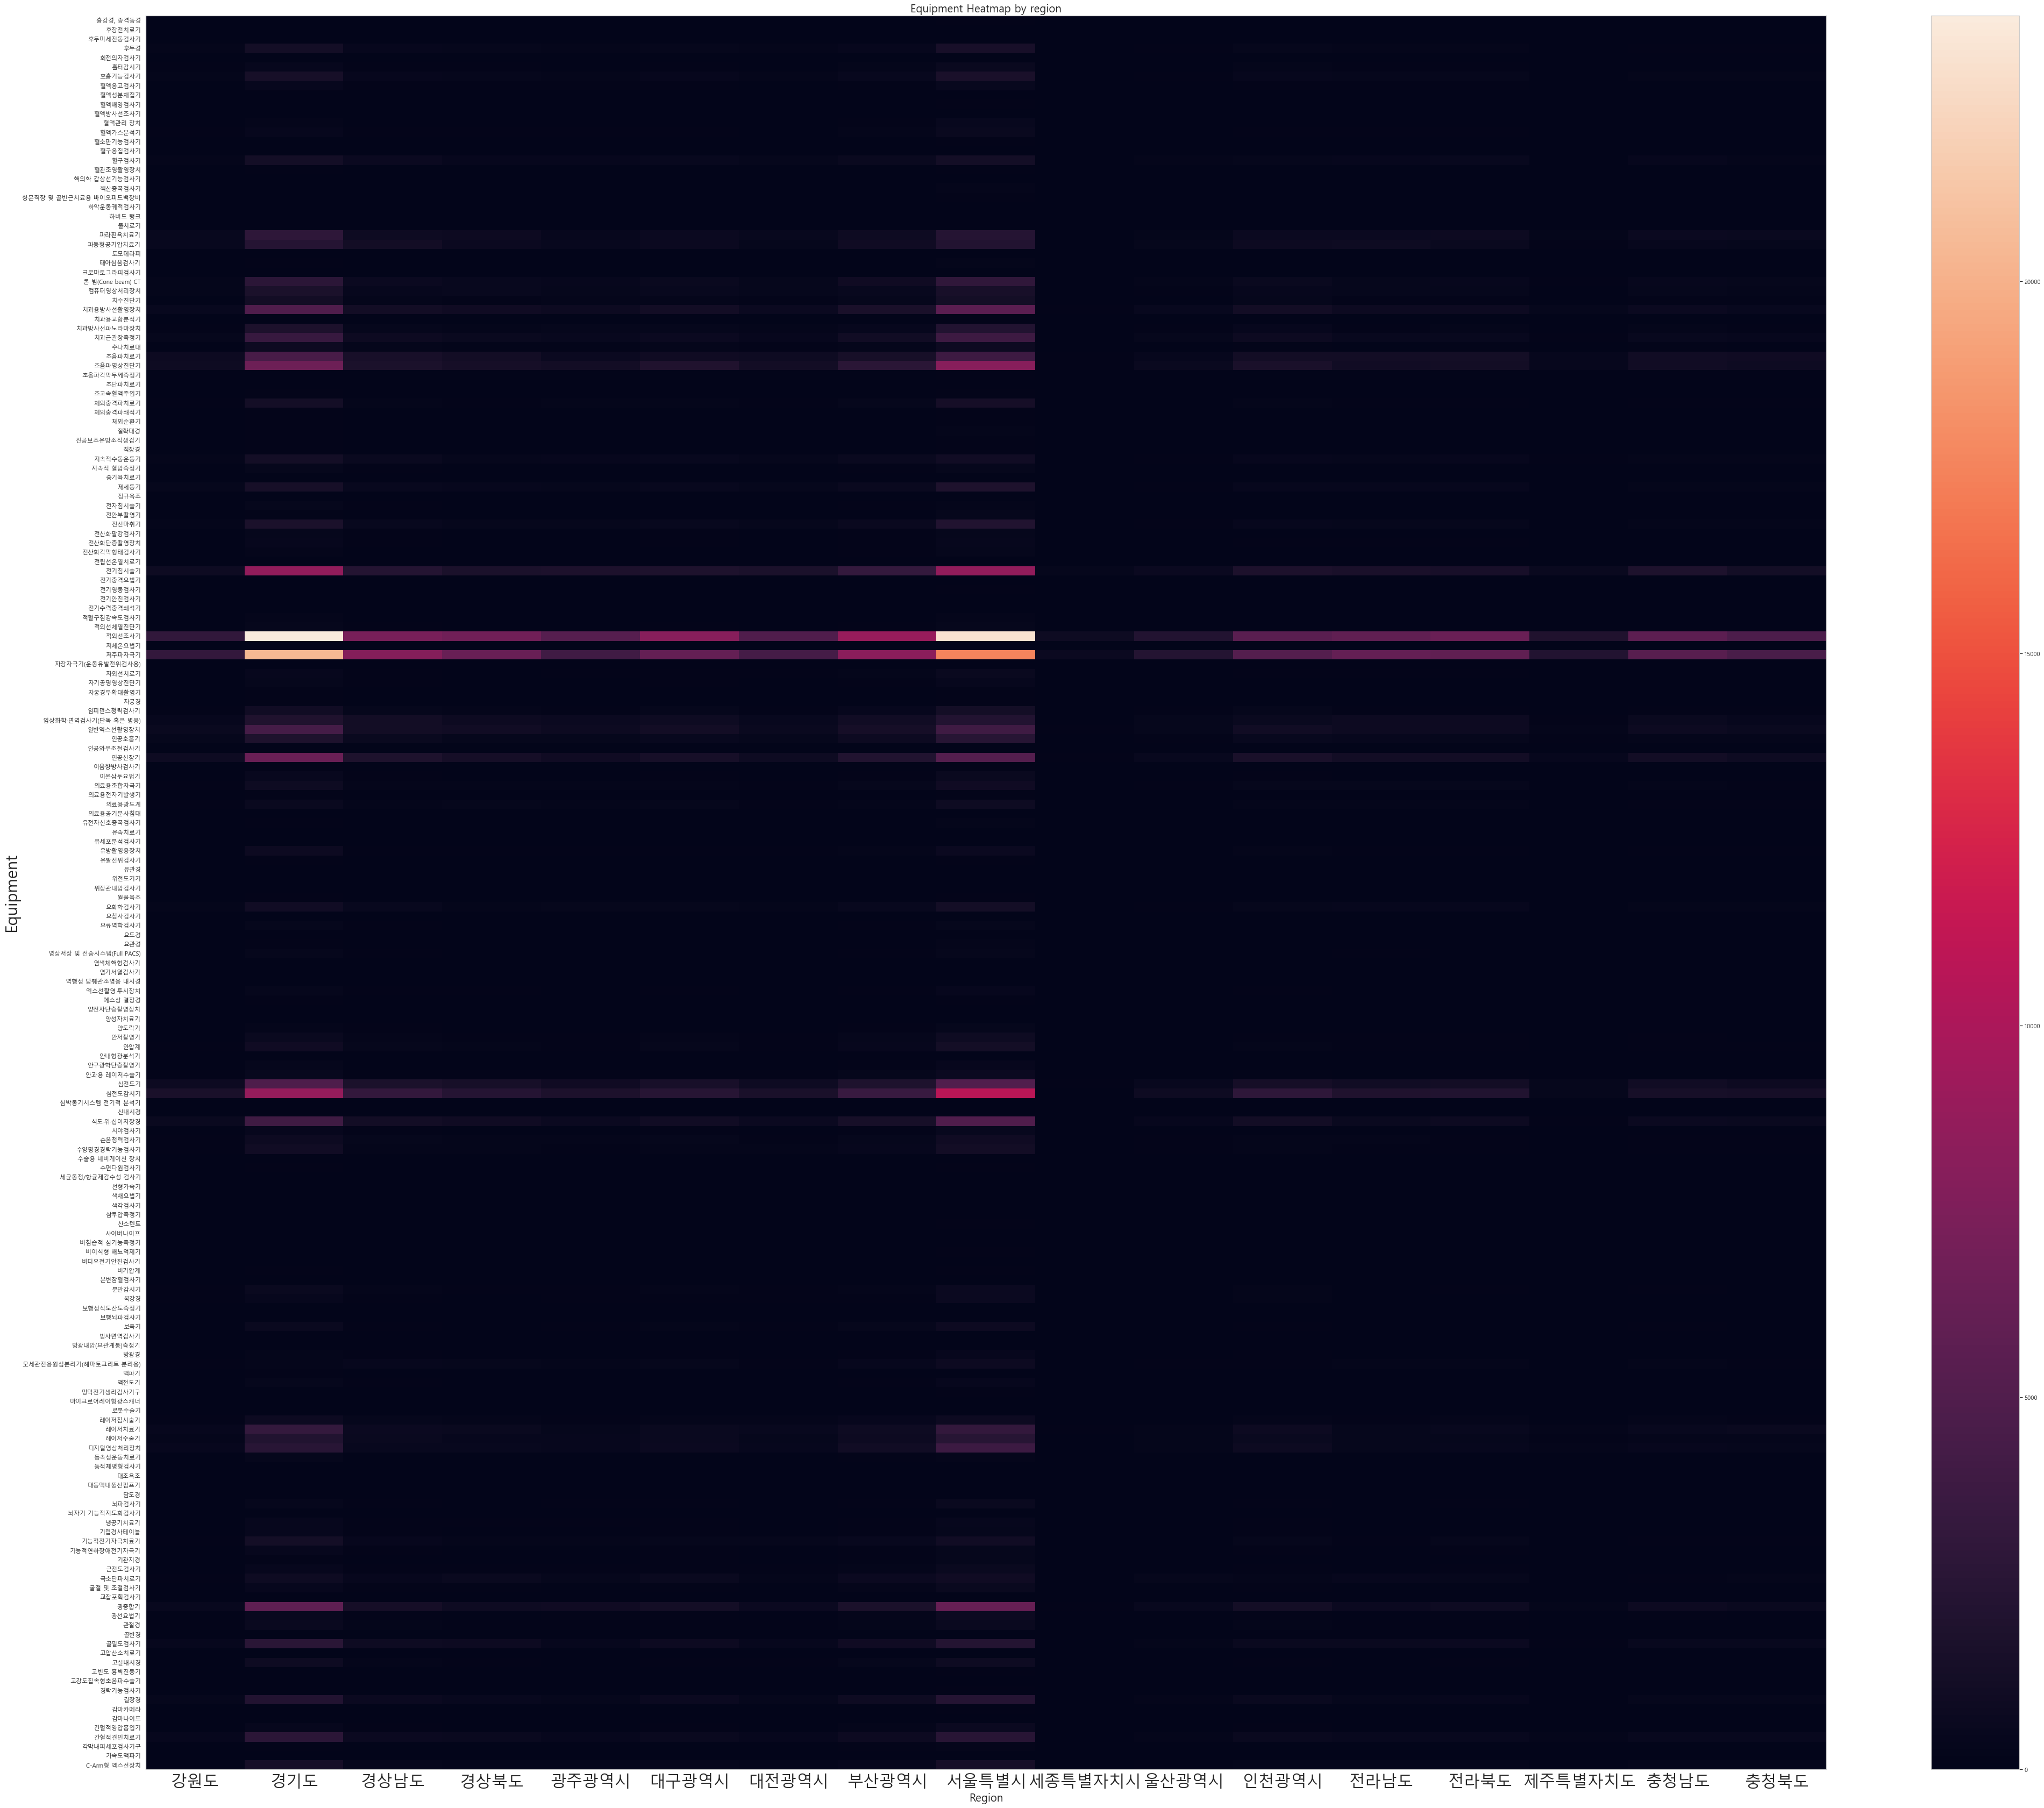

In [12]:
# heatmap 그리기
x_labels = [ i[1]  for i in  df_heatmap.columns ]

plt.rcParams['figure.figsize'] = [70, 60]
plt.pcolor(df_heatmap)
plt.xticks(np.arange(0.5, len(df_heatmap.columns), 1), x_labels, fontsize = 30)
plt.yticks(np.arange(0.5, len(df_heatmap.index), 1), df_heatmap.index)
plt.title('Equipment Heatmap by region', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Equipment', fontsize=30)
plt.colorbar()

plt.show()

- 예상대로 서울특별시, 경기도에 의료기기의 수가 많음.(색이 연할수록 수가 많음.)
- 의료장비가 부족한 지역이 어디인지 구체적으로 볼 필요가 있음.

## 3.2 희소한 의료 장비 분표 살펴보기(서울 기준 하위 20개)

In [13]:
equip_low = df_heatmap.sort_values([('장비수','서울특별시')]).fillna(0).head(20)

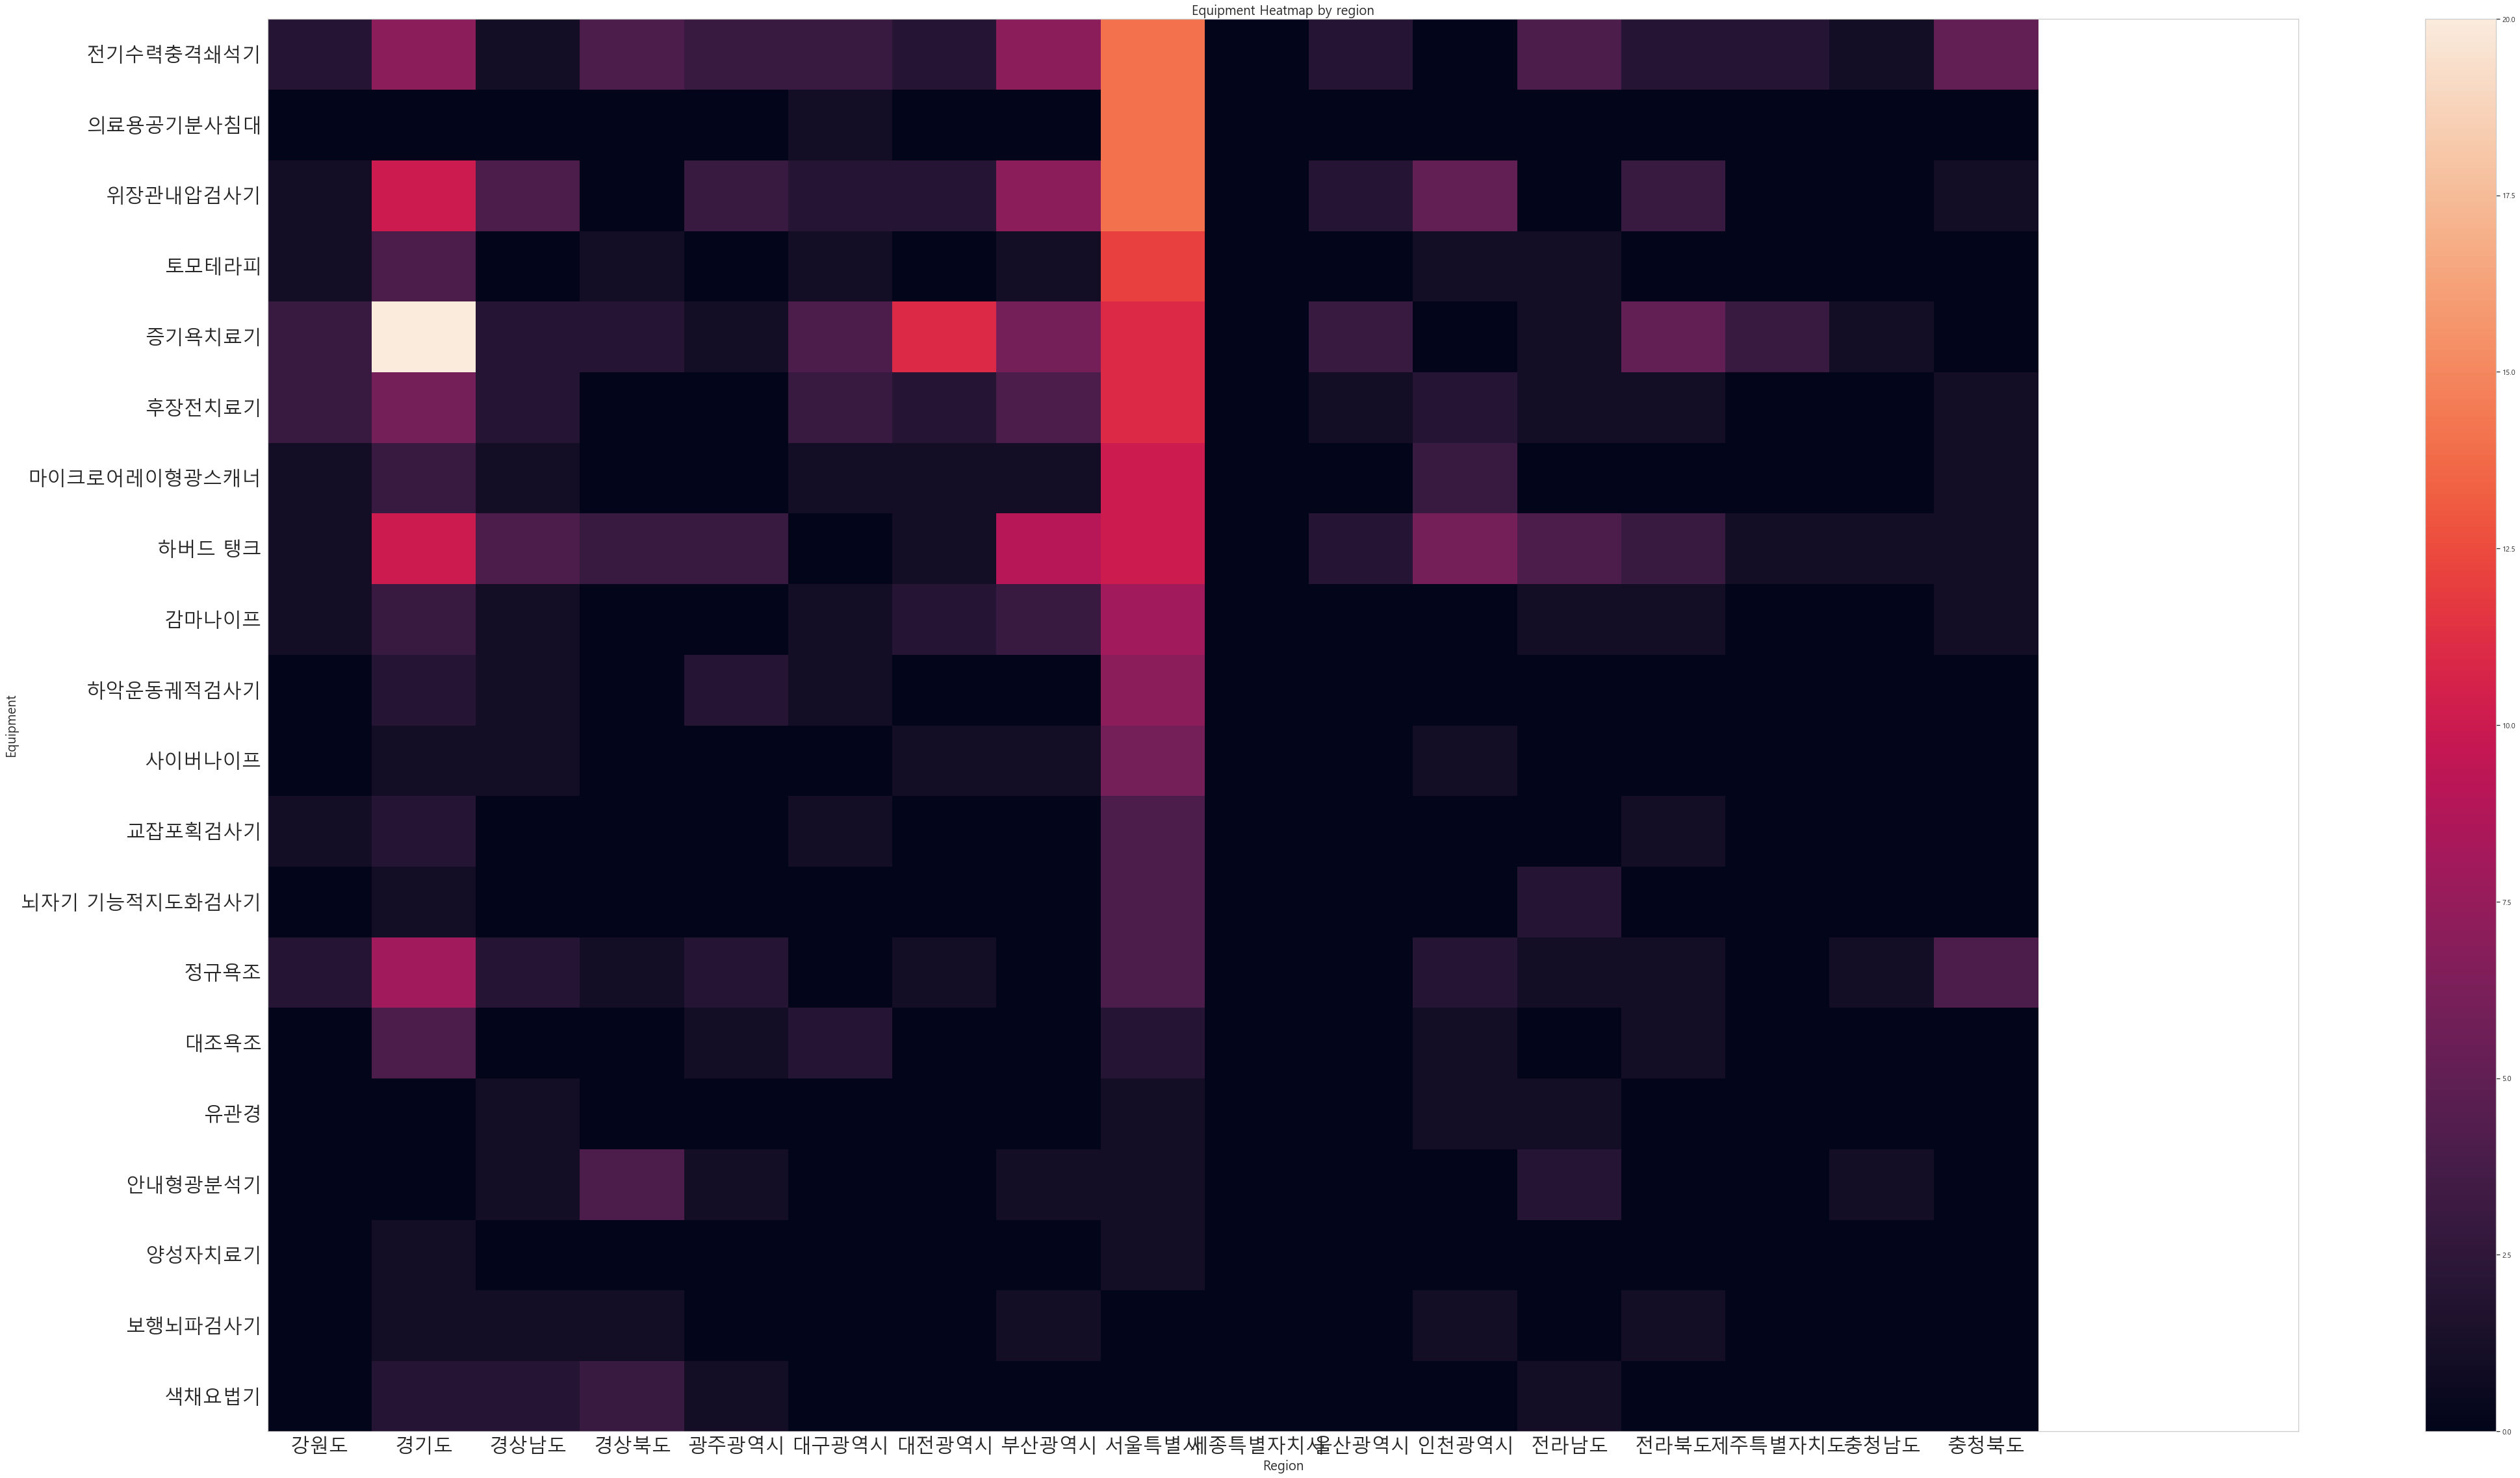

In [14]:
# heatmap 그리기
x_labels = [ i[1]  for i in  equip_low.columns ]

plt.rcParams['figure.figsize'] = [70, 40]
plt.pcolor(equip_low)
plt.xticks(np.arange(0.5, len(equip_low), 1), x_labels,  fontsize = 30)
plt.yticks(np.arange(0.5, len(equip_low.index), 1), equip_low.index, fontsize = 30)
plt.title('Equipment Heatmap by region', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Equipment', fontsize=20)
plt.colorbar()

plt.show()

- 서울에도 희소한 의료장비는 고가이고, 구하기 힘든 의료장비일 가능성이 높음.
- 고가의 희소한 의료장비는 서울, 경기도, 부산광역시 순으로 구비되어있음.
- 전국에서 고가의 희소한 의료장비는 강원도, 세종시, 충청남도, 제주도가 제일 적게 보유하고 있음.

## 3.3. 많이 보유하고 있는 의료기기의 분포 살펴보기

In [15]:
equip_high = df_heatmap.sort_values([('장비수','서울특별시')]).fillna(0).tail(20)

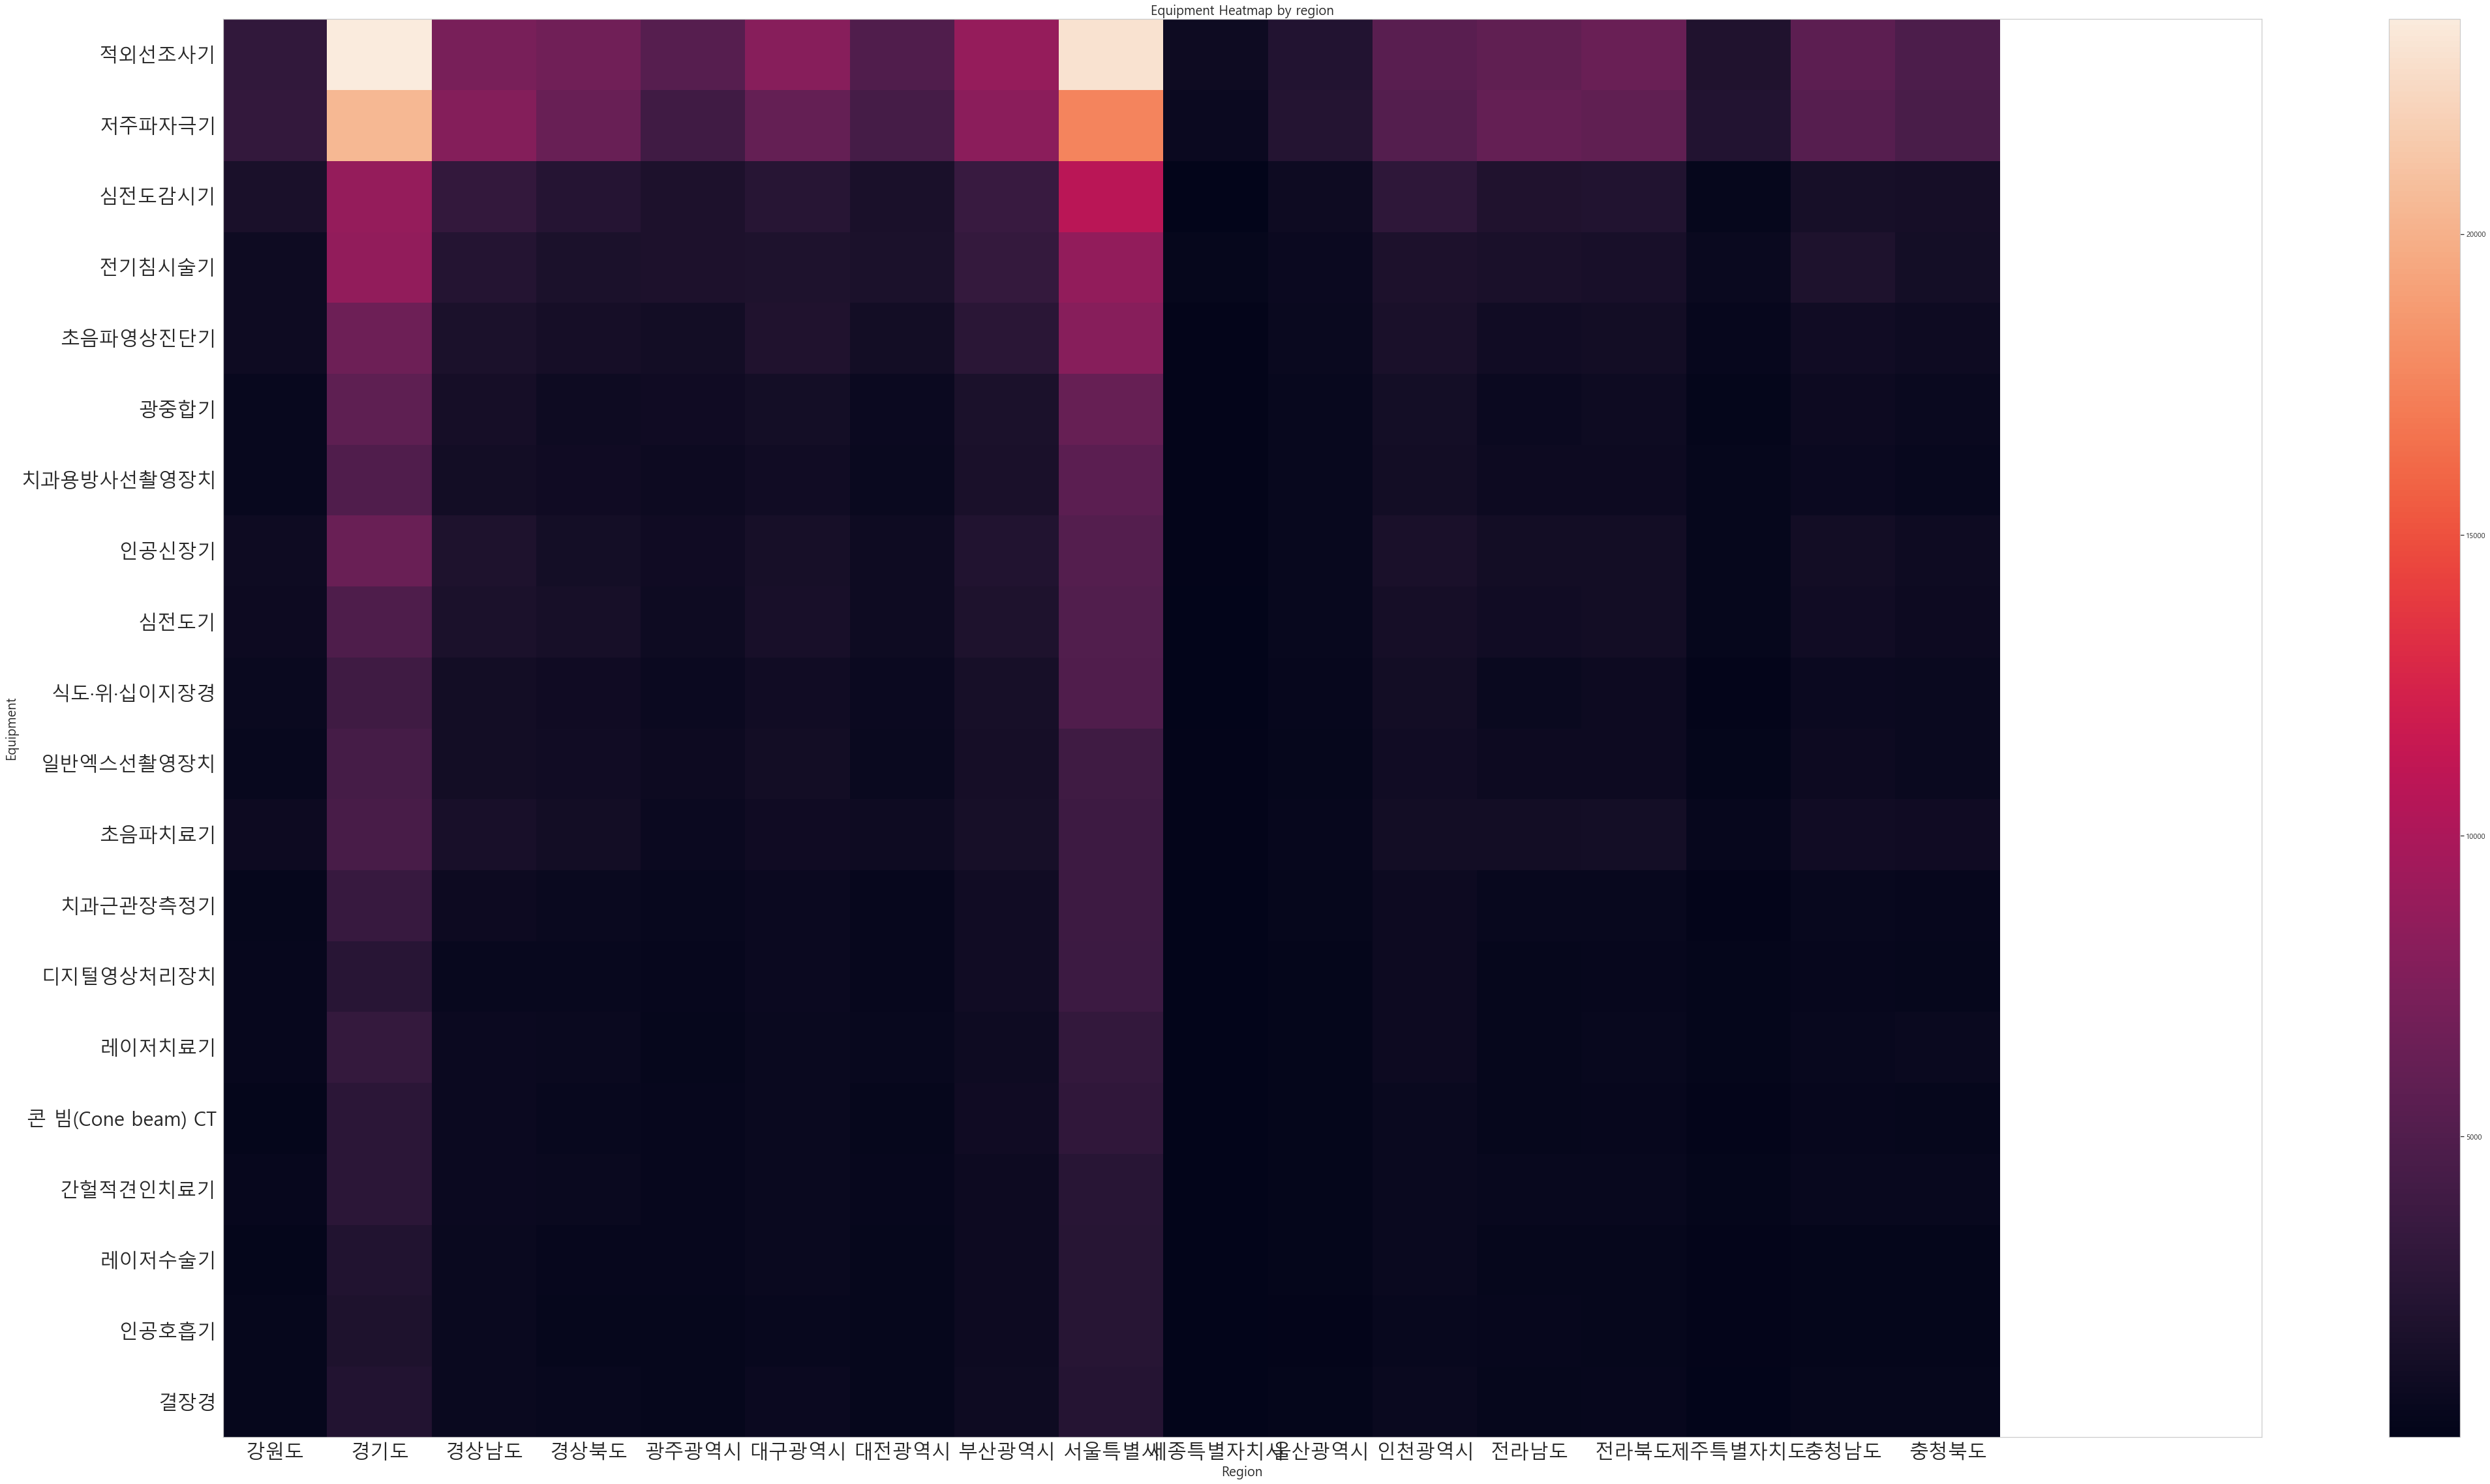

In [16]:
# heatmap 그리기
x_labels = [ i[1]  for i in  equip_high.columns ]

plt.rcParams['figure.figsize'] = [70, 40]
plt.pcolor(equip_high)
plt.xticks(np.arange(0.5, len(equip_high), 1), x_labels,  fontsize = 30)
plt.yticks(np.arange(0.5, len(equip_high.index), 1), equip_high.index, fontsize = 30)
plt.title('Equipment Heatmap by region', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Equipment', fontsize=20)
plt.colorbar()

plt.show()

- 서울에서 많이 보유하고 있는 의료장비는 많이 사용되고, 가격이 저렴하고, 개인 병원에도 구비되어 있는 의료기기 일 것으로 판단됨.
- 서울, 경기도에서 가장 많은 수를 보유하고 있었고, 강원도, 세종시, 울산시, 제주도가 적게 보유하고 있음.

# 4. 특정 의료 기기의  지역 분포 살펴보기

## 4.1.희소 의료 기기의 지역별 분포

In [17]:
# 필요한 컬럼 갖고 오기
df = data[['시도','장비대분류명','장비수']]


In [18]:
# 시도별 장비(대분류) 수
df_groupby = df.groupby(['시도','장비대분류명']).sum()
df_groupby.head()


장비수
시도  장비대분류명           
강원도 C-Arm형 엑스선장치  159
    가속도맥파기          7
    각막내피세포검사기구     19
    간헐적견인치료기      424
    간헐적양압흡입기       87

In [19]:
# groupby기준을 시도, 장비대분류명으로 하기 위해 index 추가
df_groupby =df_groupby.reset_index(inplace = False)
df.head()

,시도,장비대분류명,장비수
0,서울특별시,치과용방사선촬영장치,1
1,서울특별시,치과방사선파노라마장치,1
2,서울특별시,디지털영상처리장치,1
3,서울특별시,치과근관장측정기,1
4,서울특별시,광중합기,1


In [20]:
df_so =df_groupby[df_groupby['시도']=='서울특별시']
df_so.head()

,시도,장비대분류명,장비수
1415,서울특별시,C-Arm형 엑스선장치,1309
1416,서울특별시,가속도맥파기,59
1417,서울특별시,각막내피세포검사기구,205
1418,서울특별시,간헐적견인치료기,2556
1419,서울특별시,간헐적양압흡입기,662


In [21]:
df_seoul_sorted = df_so.sort_values('장비수')
df_seoul_sorted.head()

,시도,장비대분류명,장비수
1489,서울특별시,안내형광분석기,1
1493,서울특별시,양성자치료기,1
1509,서울특별시,유관경,1
1446,서울특별시,대조욕조,2
1549,서울특별시,정규욕조,4


         시도   장비대분류명  장비수
432    경상남도  안내형광분석기    1
608    경상북도  안내형광분석기    4
777   광주광역시  안내형광분석기    1
1308  부산광역시  안내형광분석기    1
1489  서울특별시  안내형광분석기    1
2130   전라남도  안내형광분석기    2
2645   충청남도  안내형광분석기    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


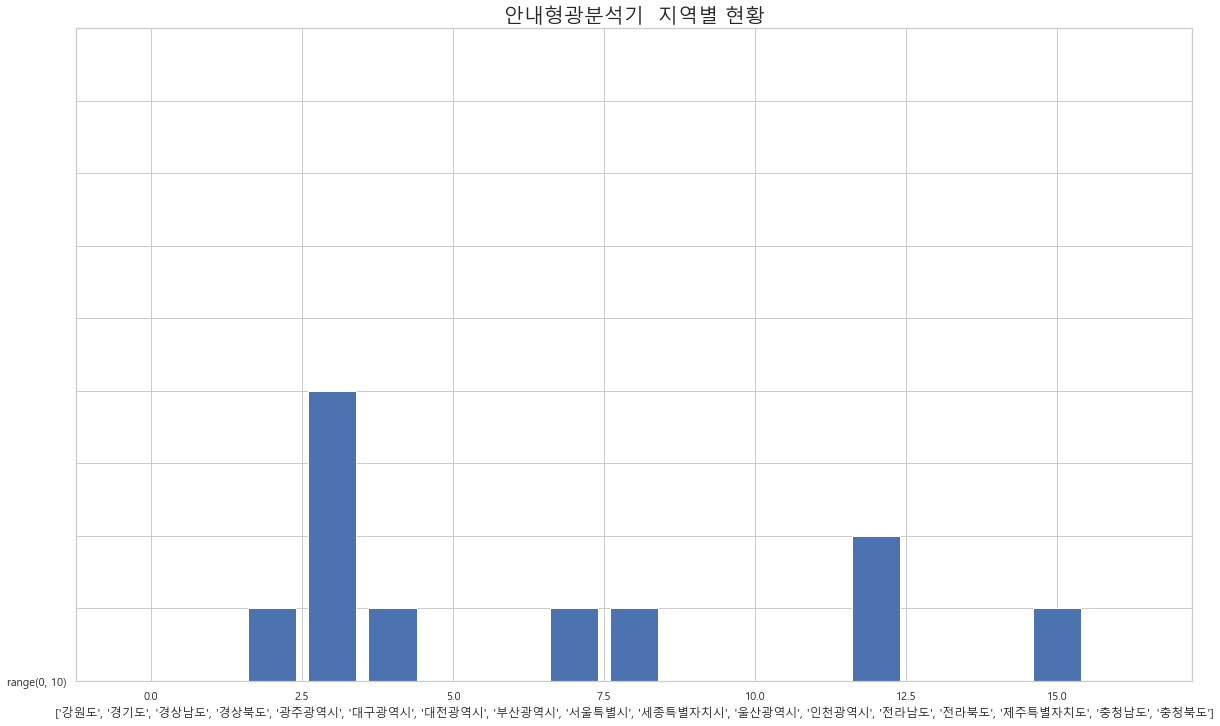

         시도  장비대분류명  장비수
254     경기도  양성자치료기    1
1493  서울특별시  양성자치료기    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


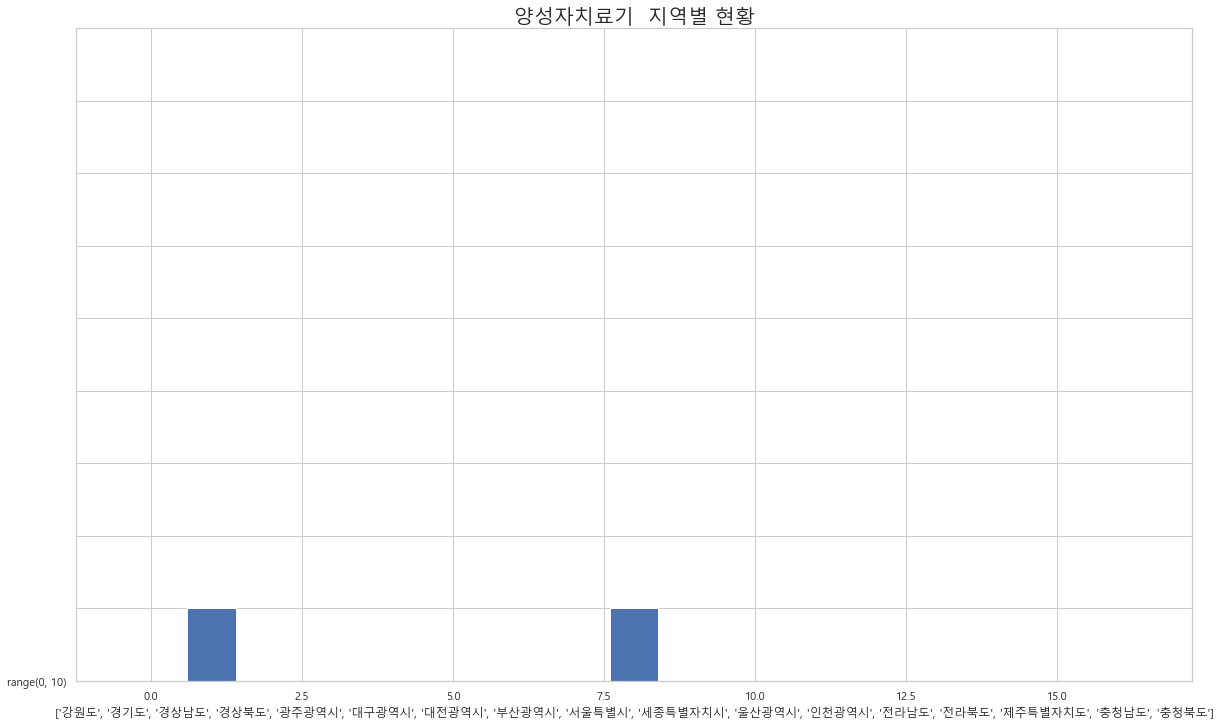

         시도 장비대분류명  장비수
450    경상남도    유관경    1
1509  서울특별시    유관경    1
1974  인천광역시    유관경    1
2148   전라남도    유관경    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


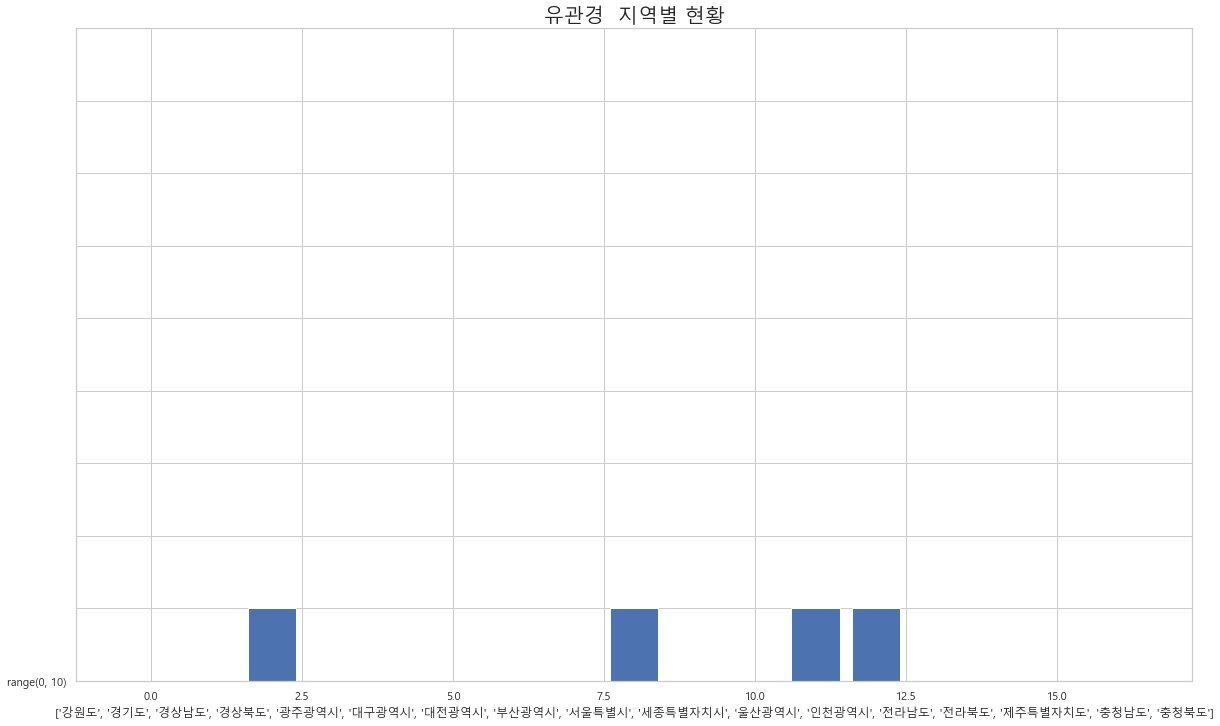

         시도 장비대분류명  장비수
206     경기도   대조욕조    4
736   광주광역시   대조욕조    1
913   대구광역시   대조욕조    2
1446  서울특별시   대조욕조    2
1914  인천광역시   대조욕조    1
2267   전라북도   대조욕조    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


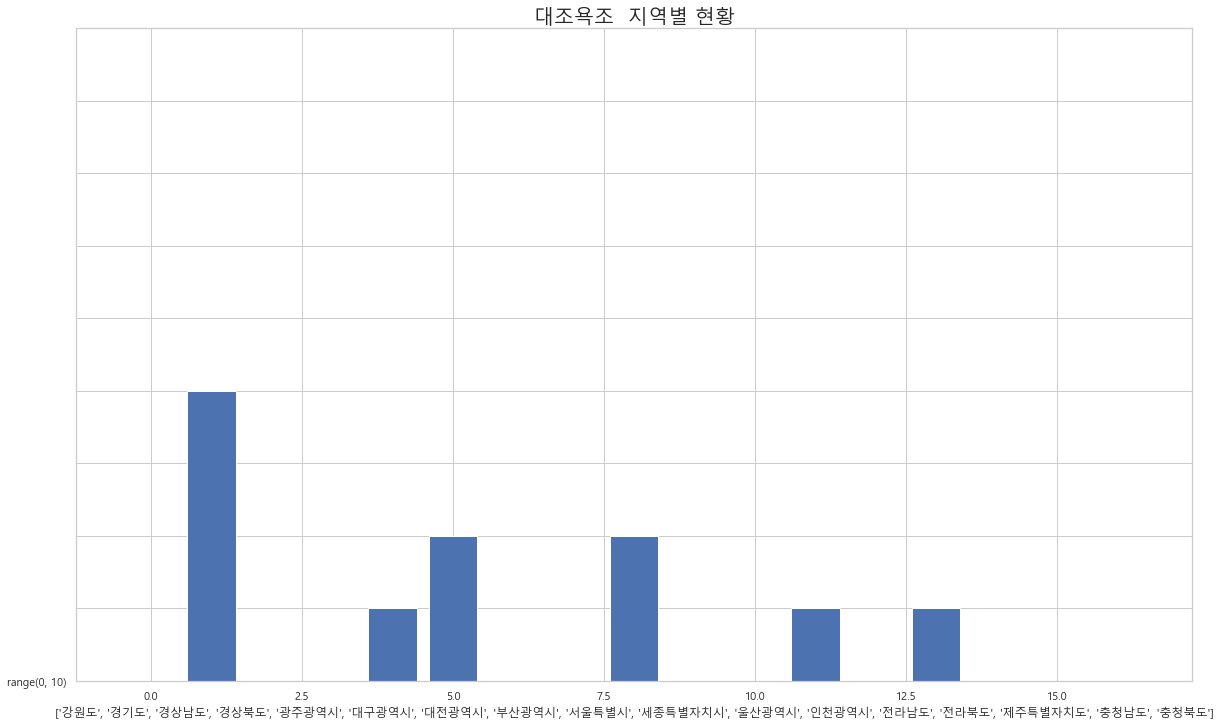

         시도 장비대분류명  장비수
125     강원도   정규욕조    2
308     경기도   정규욕조    8
489    경상남도   정규욕조    2
660    경상북도   정규욕조    1
834   광주광역시   정규욕조    2
1188  대전광역시   정규욕조    1
1549  서울특별시   정규욕조    4
2012  인천광역시   정규욕조    2
2187   전라남도   정규욕조    1
2365   전라북도   정규욕조    1
2700   충청남도   정규욕조    1
2868   충청북도   정규욕조    4


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


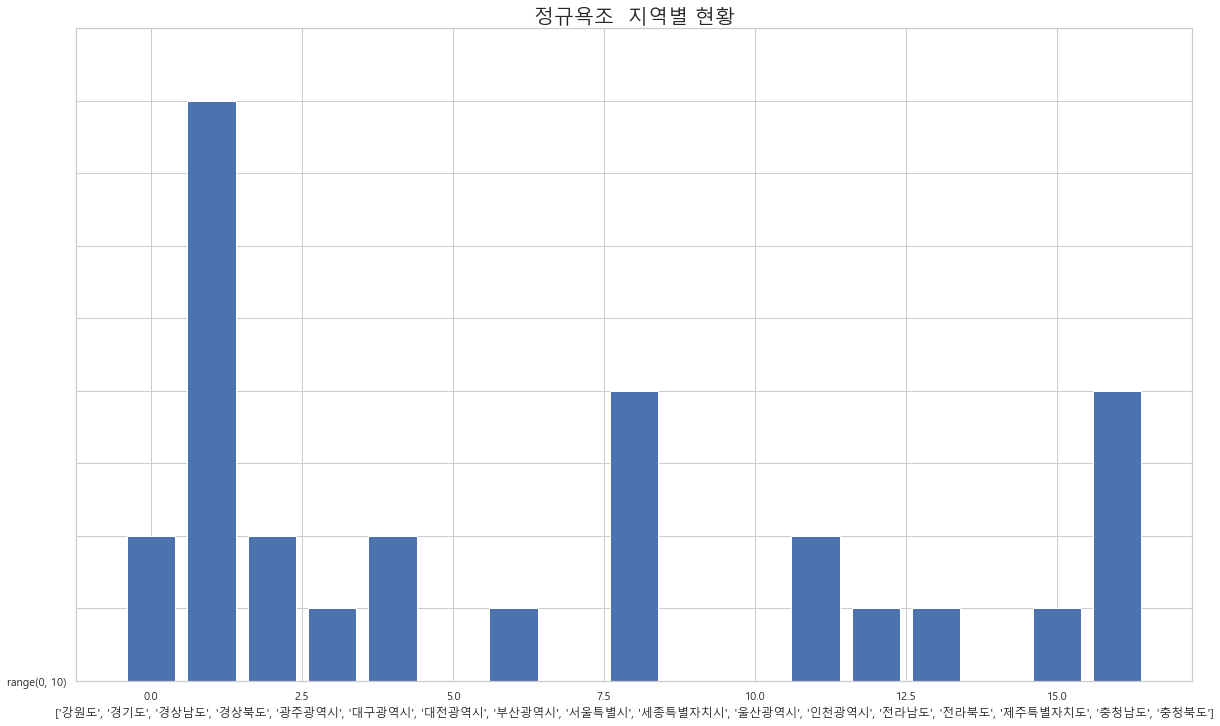

         시도         장비대분류명  장비수
202     경기도  뇌자기 기능적지도화검사기    1
1442  서울특별시  뇌자기 기능적지도화검사기    4
2087   전라남도  뇌자기 기능적지도화검사기    2


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


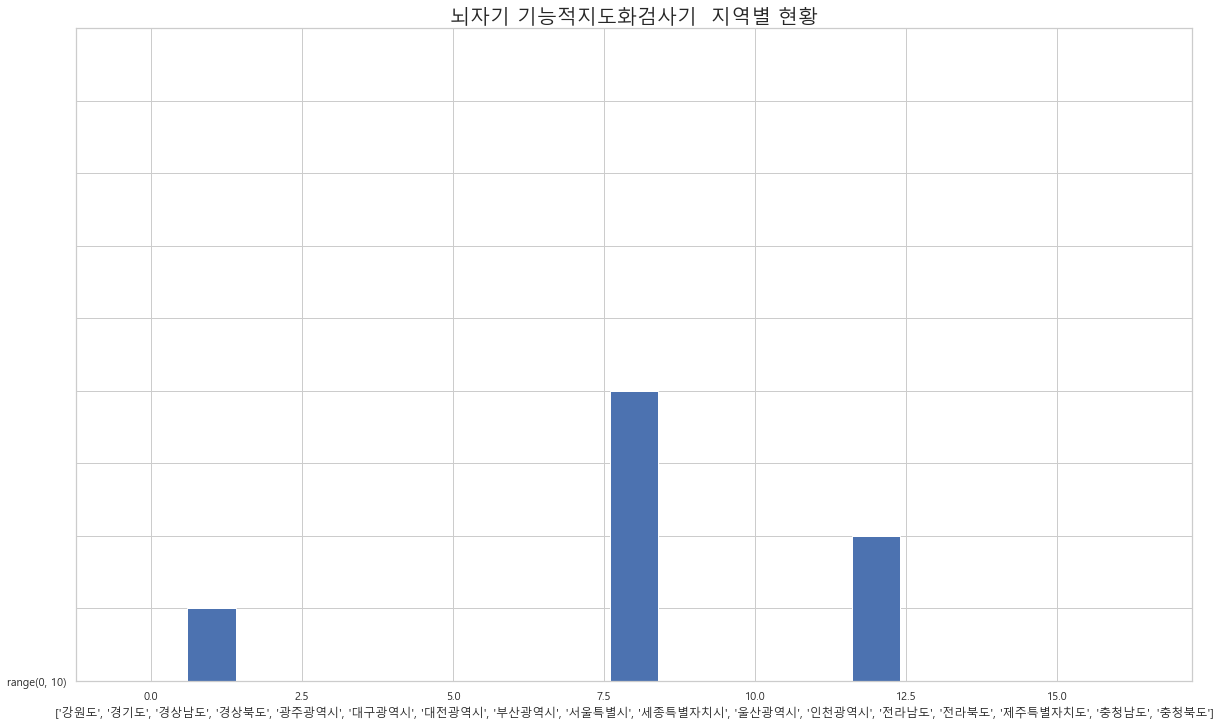

         시도   장비대분류명  장비수
17      강원도  교잡포획검사기    1
193     경기도  교잡포획검사기    2
901   대구광역시  교잡포획검사기    1
1433  서울특별시  교잡포획검사기    4
2255   전라북도  교잡포획검사기    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


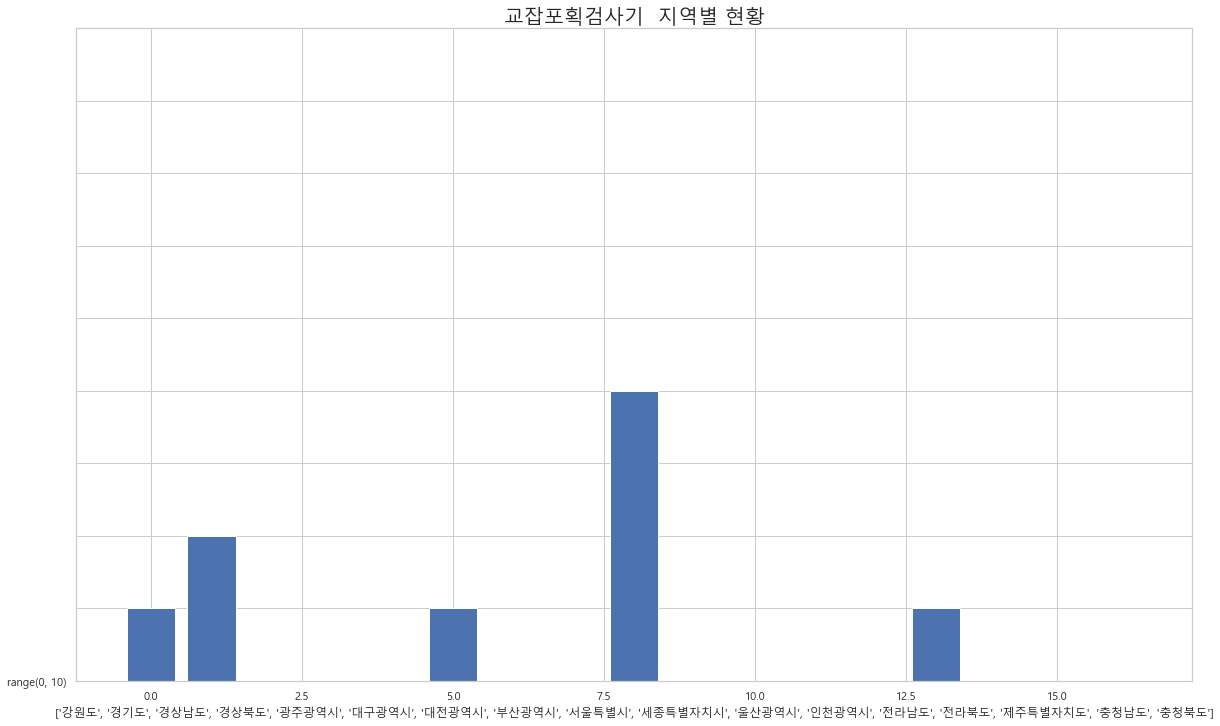

         시도  장비대분류명  장비수
232     경기도  사이버나이프    1
413    경상남도  사이버나이프    1
1115  대전광역시  사이버나이프    1
1290  부산광역시  사이버나이프    1
1471  서울특별시  사이버나이프    6
1939  인천광역시  사이버나이프    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


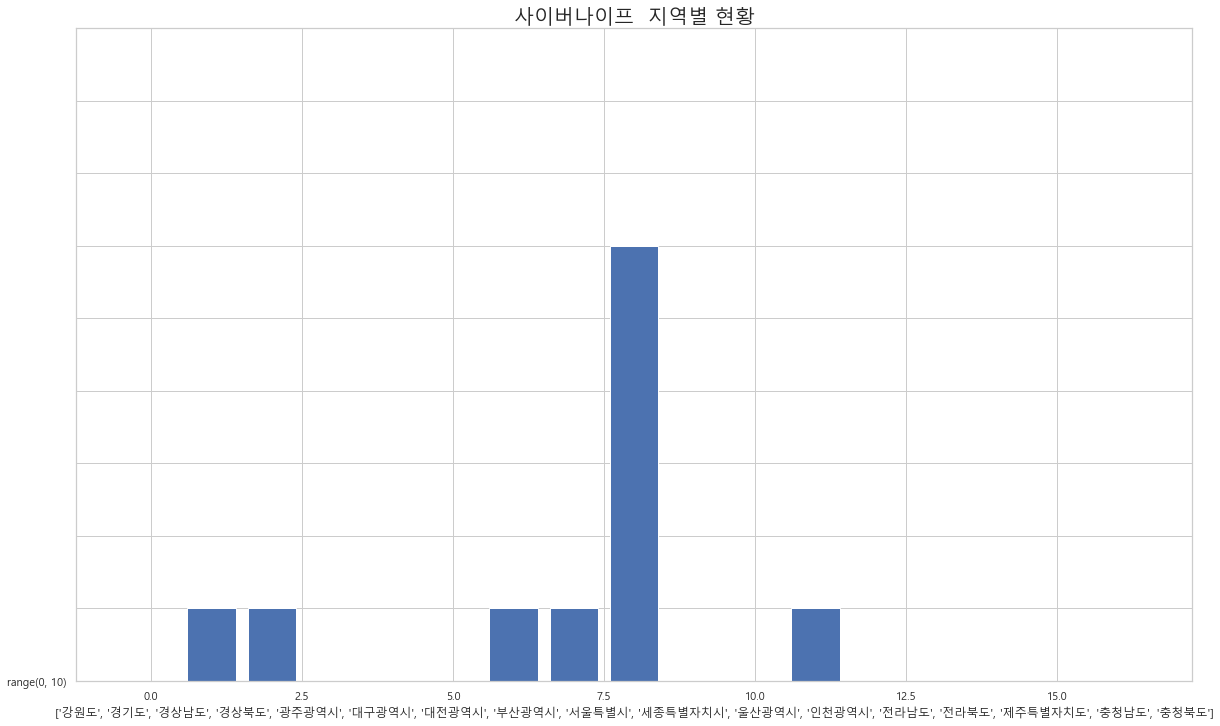

         시도     장비대분류명  장비수
339     경기도  하악운동궤적검사기    2
519    경상남도  하악운동궤적검사기    1
864   광주광역시  하악운동궤적검사기    2
1041  대구광역시  하악운동궤적검사기    1
1580  서울특별시  하악운동궤적검사기    7


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


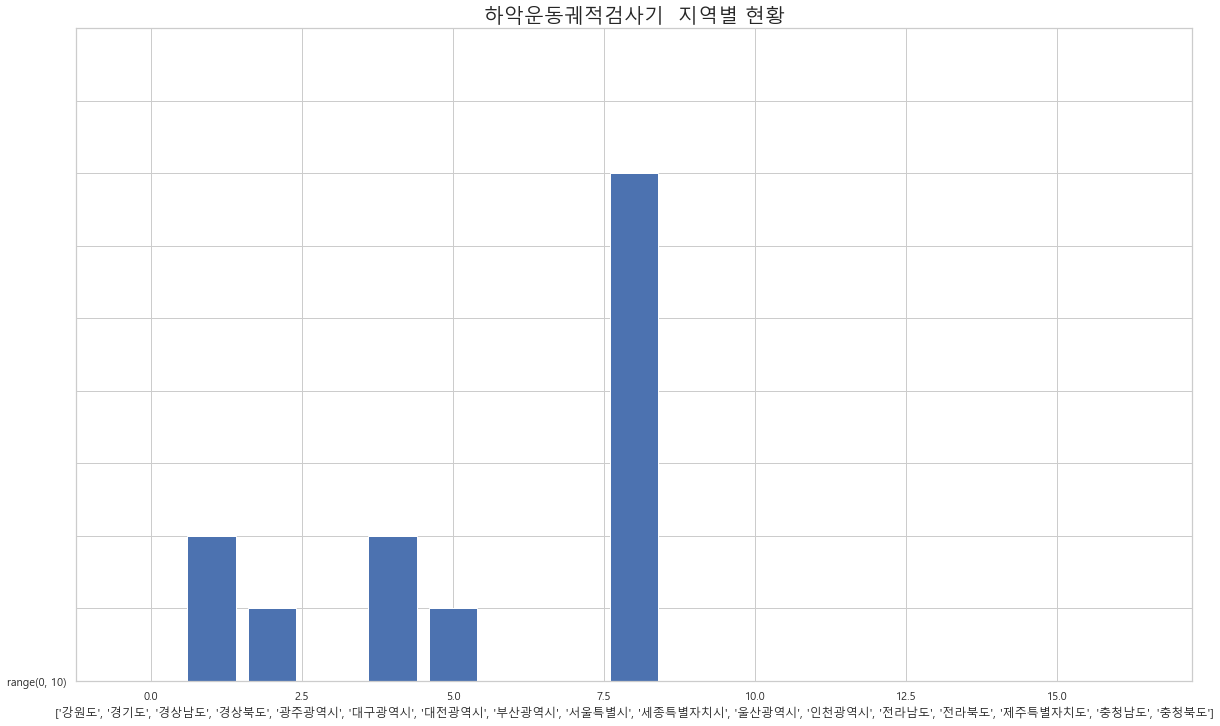

         시도 장비대분류명  장비수
5       강원도  감마나이프    1
180     경기도  감마나이프    3
365    경상남도  감마나이프    1
888   대구광역시  감마나이프    1
1067  대전광역시  감마나이프    2
1242  부산광역시  감마나이프    3
1420  서울특별시  감마나이프    8
2067   전라남도  감마나이프    1
2242   전라북도  감마나이프    1
2754   충청북도  감마나이프    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


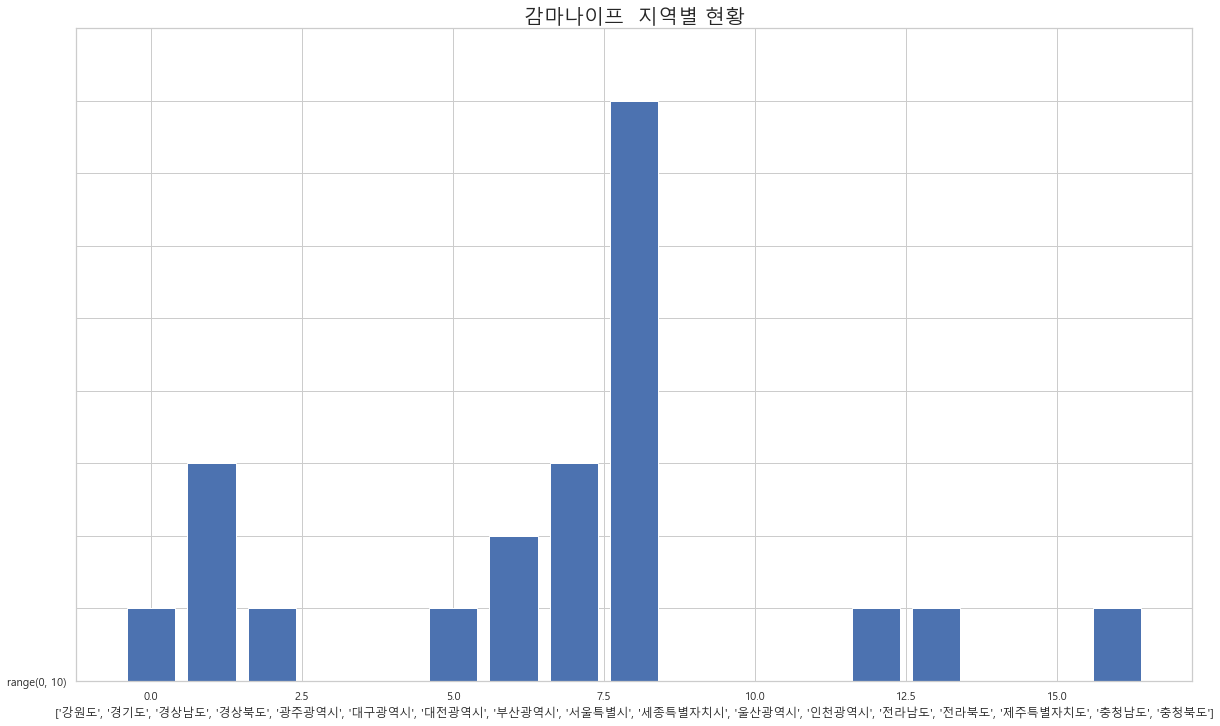

In [22]:
# for문으로 그래프 그려보면서, 지역별로 차이가 큰 의료 장비 찾기

for i in range(10):
    # 서울에 있는 의료기기를 기준으로
    
    equip = df_seoul_sorted.iloc[i,1]
    
    # 장비대분류명에서 특정 의료기기가 있는 지역 추출
    df_equipment = df_groupby.loc[df_groupby['장비대분류명'] == equip,]
    print(df_equipment)
    
    # 의료기기가 없는 지역에 0 추가하기 ( plot 그리기 위해서)
    loc_list = pd.unique(df_groupby['시도']) # 모든 시,도 
    loc = df_equipment['시도'].values # 의료장비가 있는 시,도

    for i in range(len(loc_list)) :
        if not loc_list[i] in loc:
            df_equipment.loc[i] = {'시도': loc_list[i], '장비대분류명': equip, '장비수': 0}
    
    # 시도를 기준으로 정렬하기
    df_equipment_sorted =df_equipment.sort_values('시도')
     
    # 의료 기기의 지역별 분포 그리기
    y = df_equipment_sorted['장비수']
    x_label = list(df_equipment_sorted['시도'].values)
    
    
    plt.figure(figsize = (20,12))
    plt.bar(range(len(df_equipment)),y)
    plt.xlabel(x_label)
    plt.yticks(range(10), [range(10)])
    plt.title(str(equip) + '  지역별 현황', {'fontsize': 20 })
    plt.show()


### 4.1.1 양성자 치료기 전국 분포

         시도  장비대분류명  장비수
254     경기도  양성자치료기    1
1493  서울특별시  양성자치료기    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


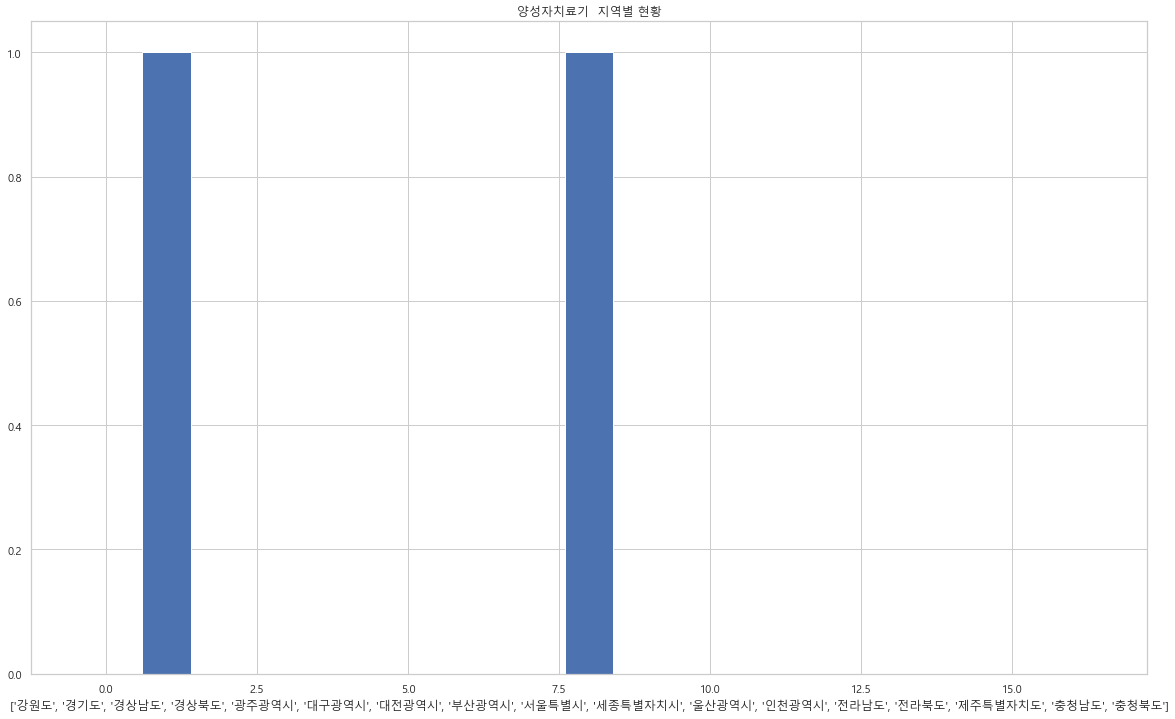

In [23]:
# 기기이름
equip = df_seoul_sorted.iloc[1,1]

# 기기이름 데이터만 뽑기
df_equipment = df_groupby.loc[df_groupby['장비대분류명']== equip,]
print(df_equipment)

# 기기가 없는 지역에 0 추가하기
loc_list = pd.unique(df_groupby['시도']) # 모든 시,도 
loc = df_equipment['시도'].values # 의료장비가 있는 시,도

for i in range(len(loc_list)) :
    if not loc_list[i] in loc:
        df_equipment.loc[i] = {'시도': loc_list[i], '장비대분류명': equip, '장비수': 0}

df_equipment_sorted =df_equipment.sort_values('시도')

y = df_equipment_sorted['장비수']
x_label = list(df_equipment_sorted['시도'].values)


plt.figure(figsize = (20,12))
plt.bar(range(len(df_equipment)),y)
plt.xlabel(x_label, fontsize = 12)
plt.title(str(equip) + '  지역별 현황')
plt.show()

> 양성자 치료기
- 전이가 없는 국소부위에 제한된 병기의 고형암 (solid tumor)에 적용 가능
- 뇌척수종양(뇌종양, 척색종 등), 인구종양 (흑색종, 망막모세종), 두경부암, 폐암, 식도암, 초기유방암,전립선암, 조기 간암, 자궁경부암등에 적용 가능
- 서울(1), 경기도(1)에만 있음.

### 4.1.2. 뇌자기 기능적지도화검사기

         시도         장비대분류명  장비수
202     경기도  뇌자기 기능적지도화검사기    1
1442  서울특별시  뇌자기 기능적지도화검사기    4
2087   전라남도  뇌자기 기능적지도화검사기    2


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


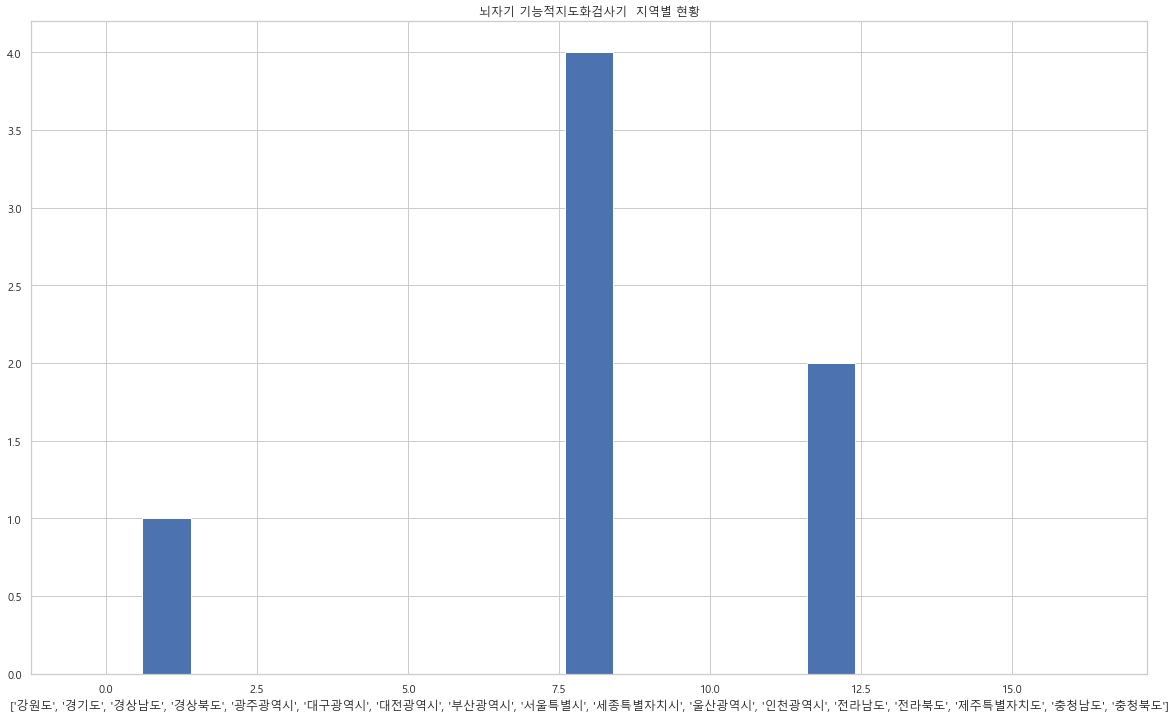

In [24]:
equip = df_seoul_sorted.iloc[5,1]

df_equipment = df_groupby.loc[df_groupby['장비대분류명'] == equip,]
print(df_equipment)


# 기기가 없는 지역에 0 추가하기
loc_list = pd.unique(df_groupby['시도']) # 모든 시,도 
loc = df_equipment['시도'].values # 의료장비가 있는 시,도

for i in range(len(loc_list)) :
    if not loc_list[i] in loc:
        df_equipment.loc[i] = {'시도': loc_list[i], '장비대분류명': equip, '장비수': 0}

df_equipment_sorted =df_equipment.sort_values('시도')

y = df_equipment_sorted['장비수']
x_label = list(df_equipment_sorted['시도'].values)


plt.figure(figsize = (20,12))
plt.bar(range(len(df_equipment)),y)
plt.xlabel(x_label, fontsize = 12)
plt.title(str(equip) + '  지역별 현황')
plt.show()

> 뇌자기 기능적지도화검사기
- 뇌지도화에 이용
- 경기도(1), 서울특별시(4), 전라남도(2)

In [25]:
### 4.2.3. 사이버 나이프 전국 분포

         시도  장비대분류명  장비수
232     경기도  사이버나이프    1
413    경상남도  사이버나이프    1
1115  대전광역시  사이버나이프    1
1290  부산광역시  사이버나이프    1
1471  서울특별시  사이버나이프    6
1939  인천광역시  사이버나이프    1


C:\Users\shiney\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


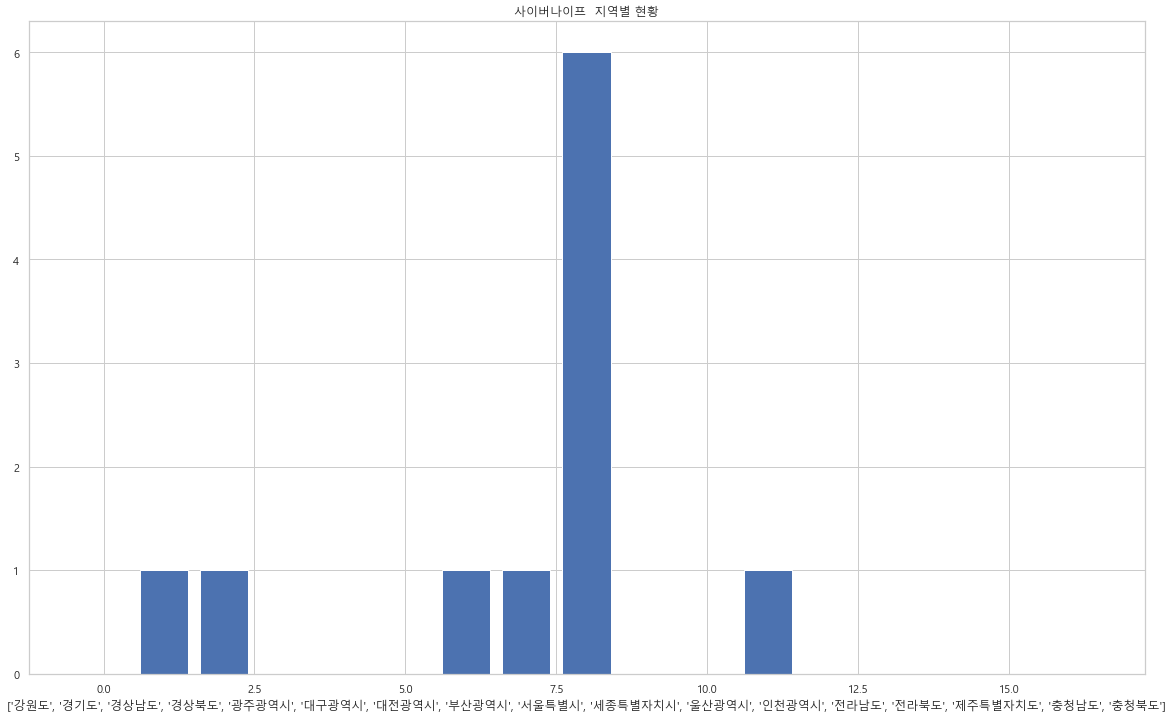

In [26]:
equip = df_seoul_sorted.iloc[7,1]

df_equipment = df_groupby.loc[df_groupby['장비대분류명'] == equip,]
print(df_equipment)


# 기기가 없는 지역에 0 추가하기
loc_list = pd.unique(df_groupby['시도']) # 모든 시,도 
loc = df_equipment['시도'].values # 의료장비가 있는 시,도

for i in range(len(loc_list)) :
    if not loc_list[i] in loc:
        df_equipment.loc[i] = {'시도': loc_list[i], '장비대분류명': equip, '장비수': 0}

df_equipment_sorted =df_equipment.sort_values('시도')

y = df_equipment_sorted['장비수']
x_label = list(df_equipment_sorted['시도'].values)


plt.figure(figsize = (20,12))
plt.bar(range(len(df_equipment)),y)
plt.xlabel(x_label)
plt.title(str(equip) + '  지역별 현황')
plt.show()

> 사이버 나이프
-  간암, 폐암, 췌장암 등 체부 종양 치료
- 경기도(1), 경상남도(1), 대전광역시(1), 부산광역시(1), 서울특별시(6), 인천광역시(1)

## 4.2. 많은 의료기기의 전국 분포

### 4.2.1 적외선 조사기 전국 분포

           시도  장비대분류명    장비수
110       강원도  적외선조사기   3104
293       경기도  적외선조사기  23573
474      경상남도  적외선조사기   7235
645      경상북도  적외선조사기   6786
819     광주광역시  적외선조사기   5339
997     대구광역시  적외선조사기   8091
1173    대전광역시  적외선조사기   4957
1350    부산광역시  적외선조사기   8841
1534    서울특별시  적외선조사기  23020
1673  세종특별자치시  적외선조사기    848
1822    울산광역시  적외선조사기   2158
1998    인천광역시  적외선조사기   5449
2172     전라남도  적외선조사기   5848
2350     전라북도  적외선조사기   6445
2519  제주특별자치도  적외선조사기   2010
2685     충청남도  적외선조사기   5665
2853     충청북도  적외선조사기   4727


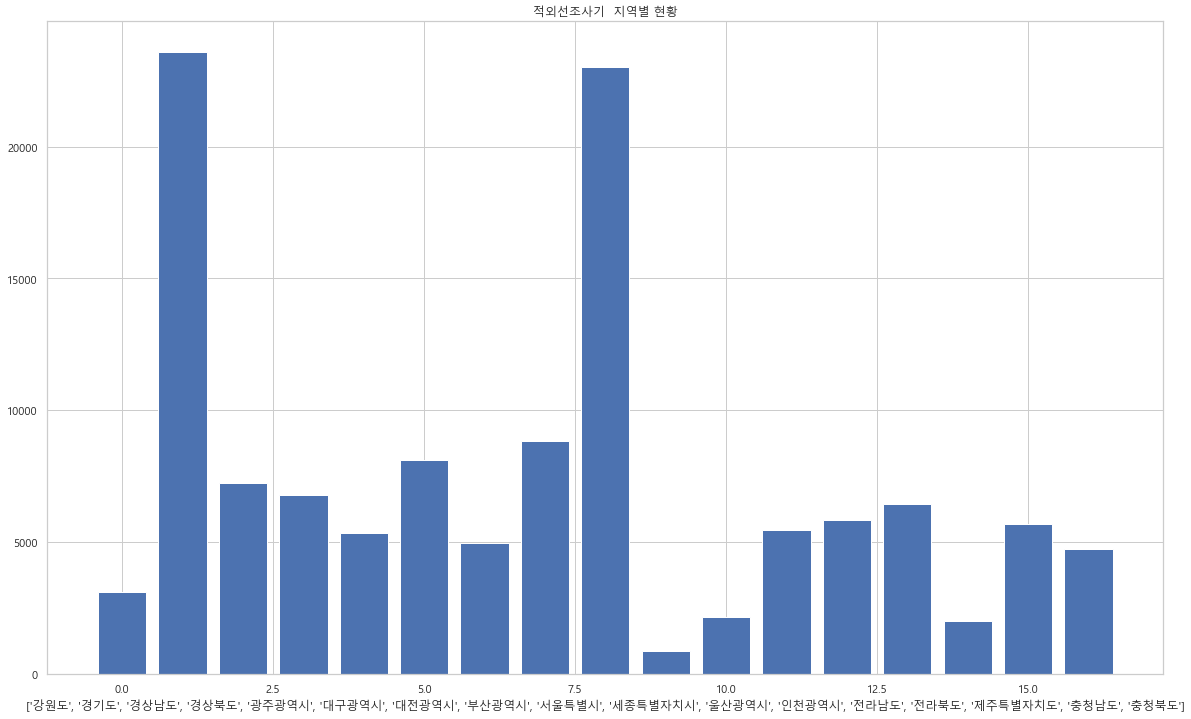

In [27]:
# 기기이름
equip = df_seoul_sorted.iloc[-1,1]

# 기기이름 데이터만 뽑기
df_equipment = df_groupby.loc[df_groupby['장비대분류명']== equip,]
print(df_equipment)


# 기기가 없는 지역에 0 추가하기
loc_list = pd.unique(df_groupby['시도']) # 모든 시,도 
loc = df_equipment['시도'].values # 의료장비가 있는 시,도

for i in range(len(loc_list)) :
    if not loc_list[i] in loc:
        df_equipment.loc[i] = {'시도': loc_list[i], '장비대분류명': equip, '장비수': 0}

df_equipment_sorted =df_equipment.sort_values('시도')

y = df_equipment_sorted['장비수']
x_label = list(df_equipment_sorted['시도'].values)


plt.figure(figsize = (20,12))
plt.bar(range(len(df_equipment)),y)
plt.xlabel(x_label, fontsize = 12)
plt.title(str(equip) + '  지역별 현황')
plt.show()

> 적외선 조사기
- 근육 통증 완화, 물리치료 기기, 인터넷에서도 구매 가능
- 서울(23020), 경기도(23573)에 가장 많이 있고, 세종시(848), 제주도(2010)가 제일 적음.
- 가장 많은 경기도와 가장 적은 세종시를 비교하면 27배 차이가 남

### 4.2.2. 저주파 자극기 전국 분포

           시도  장비대분류명    장비수
108       강원도  저주파자극기   3201
291       경기도  저주파자극기  20405
472      경상남도  저주파자극기   7834
643      경상북도  저주파자극기   6284
817     광주광역시  저주파자극기   3982
995     대구광역시  저주파자극기   6114
1171    대전광역시  저주파자극기   4273
1348    부산광역시  저주파자극기   8230
1532    서울특별시  저주파자극기  17574
1672  세종특별자치시  저주파자극기    658
1820    울산광역시  저주파자극기   2253
1996    인천광역시  저주파자극기   5240
2170     전라남도  저주파자극기   6146
2348     전라북도  저주파자극기   5891
2517  제주특별자치도  저주파자극기   2178
2683     충청남도  저주파자극기   5341
2851     충청북도  저주파자극기   4537


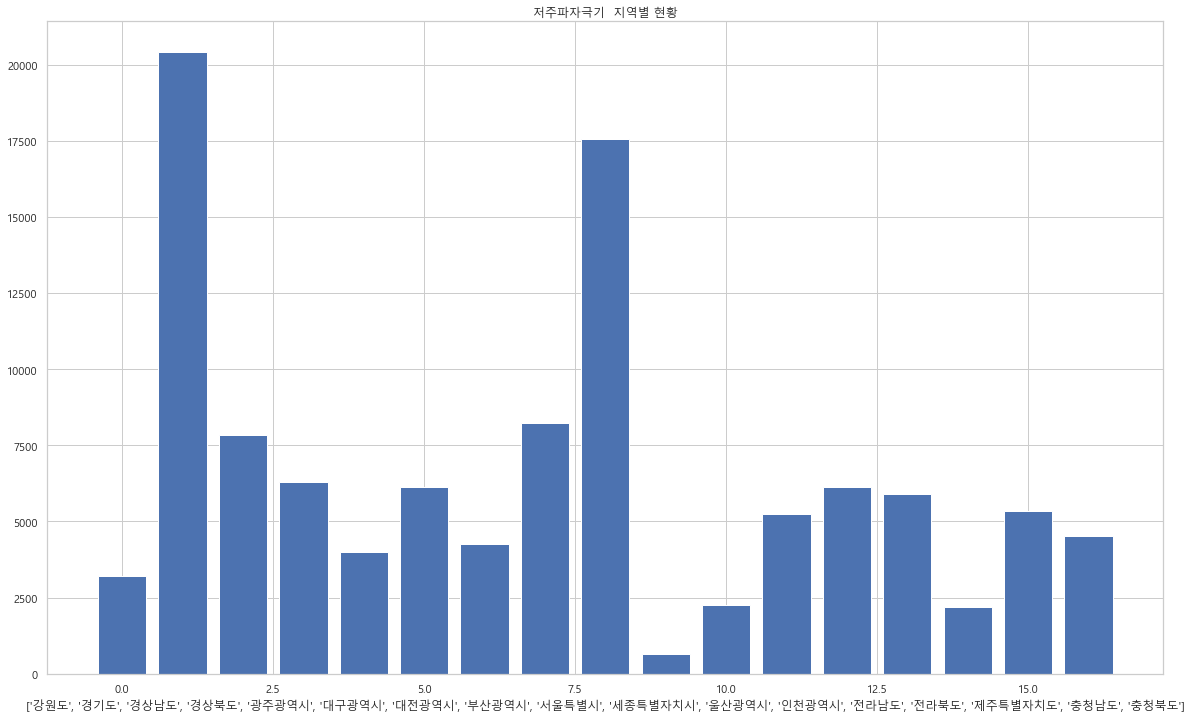

In [28]:
# 기기이름
equip = df_seoul_sorted.iloc[-2,1]

# 기기이름 데이터만 뽑기
df_equipment = df_groupby.loc[df_groupby['장비대분류명']== equip,]
print(df_equipment)


# 기기가 없는 지역에 0 추가하기
loc_list = pd.unique(df_groupby['시도']) # 모든 시,도 
loc = df_equipment['시도'].values # 의료장비가 있는 시,도

for i in range(len(loc_list)) :
    if not loc_list[i] in loc:
        df_equipment.loc[i] = {'시도': loc_list[i], '장비대분류명': equip, '장비수': 0}

df_equipment_sorted =df_equipment.sort_values('시도')

y = df_equipment_sorted['장비수']
x_label = list(df_equipment_sorted['시도'].values)


plt.figure(figsize = (20,12))
plt.bar(range(len(df_equipment)),y)
plt.xlabel(x_label, fontsize = 12)
plt.title(str(equip) + '  지역별 현황')
plt.show()

> 저주파 자극기
- 신경과 근육의 통증을 없애거나 자극을 주는 용도로 사용되는 기기
- 서울(17574), 경기도(20405)에 가장 많이 있고, 세종시(658), 제주도(2178)가 제일 적음.
- 가장 많은 경기도와 가장 적은 세종시를 비교하면 약 28배 차이가 남

### 4.2.3. 심전도감시기  전국 분포

           시도  장비대분류명    장비수
65        강원도  심전도감시기   1582
247       경기도  심전도감시기   8778
428      경상남도  심전도감시기   3165
604      경상북도  심전도감시기   2320
773     광주광역시  심전도감시기   1765
951     대구광역시  심전도감시기   2450
1128    대전광역시  심전도감시기   1591
1304    부산광역시  심전도감시기   3538
1485    서울특별시  심전도감시기  10780
1643  세종특별자치시  심전도감시기     61
1779    울산광역시  심전도감시기    908
1952    인천광역시  심전도감시기   2898
2126     전라남도  심전도감시기   1957
2305     전라북도  심전도감시기   2043
2476  제주특별자치도  심전도감시기    339
2641     충청남도  심전도감시기   1439
2811     충청북도  심전도감시기   1332


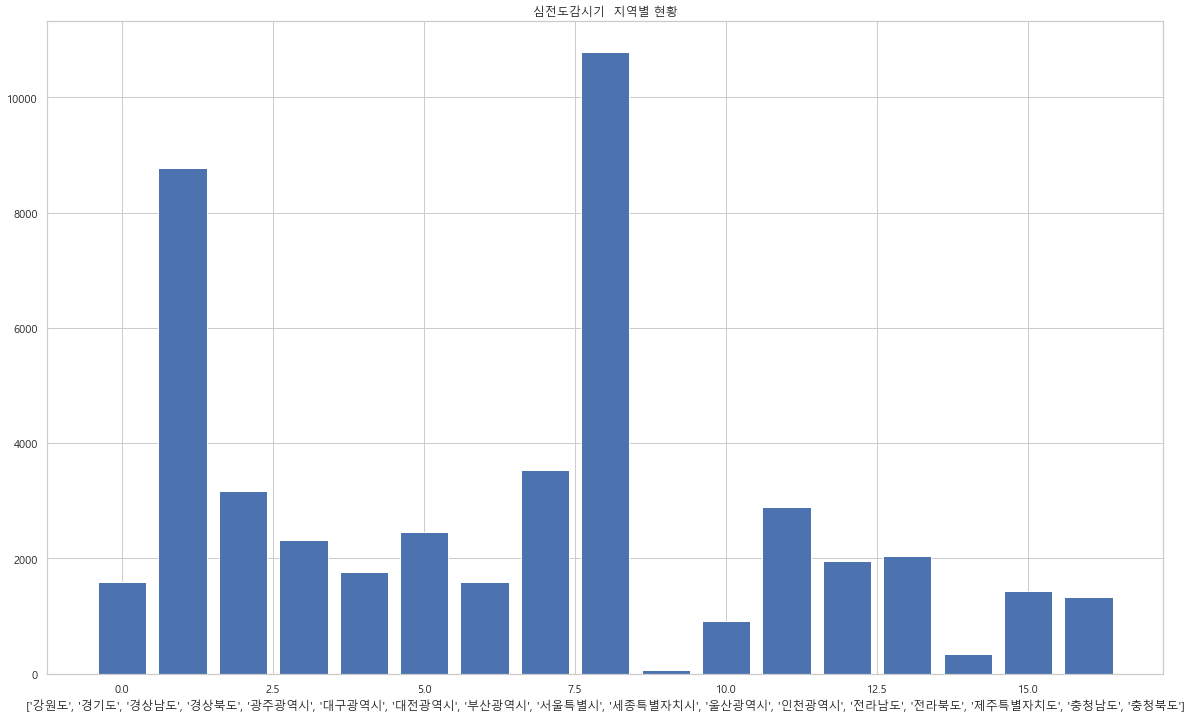

In [29]:
# 기기이름
equip = df_seoul_sorted.iloc[-3,1]

# 기기이름 데이터만 뽑기
df_equipment = df_groupby.loc[df_groupby['장비대분류명']== equip,]
print(df_equipment)


# 기기가 없는 지역에 0 추가하기
loc_list = pd.unique(df_groupby['시도']) # 모든 시,도 
loc = df_equipment['시도'].values # 의료장비가 있는 시,도

for i in range(len(loc_list)) :
    if not loc_list[i] in loc:
        df_equipment.loc[i] = {'시도': loc_list[i], '장비대분류명': equip, '장비수': 0}

df_equipment_sorted =df_equipment.sort_values('시도')

y = df_equipment_sorted['장비수']
x_label = list(df_equipment_sorted['시도'].values)


plt.figure(figsize = (20,12))
plt.bar(range(len(df_equipment)),y)
plt.xlabel(x_label, fontsize = 12)
plt.title(str(equip) + '  지역별 현황')
plt.show()

> 심전도 감시기
- 환자의 심전도(ECG), 혈중산소농도(SpO2), 혈압(NIBP), 맥박(Pulse Rate), 호흡(Respiration Rate) 같은 생체신호를 관찰
- 중환자실, 수술실에서 많이 볼 수 있음.
- 서울(10780), 경기도(8778)에 가장 많이 있고, 세종시(61), 제주도(339)가 제일 적음.
- 중환자실, 수술실 등에서 많이 사용되는 기기로, 서울에 그만큼 수술과 응급 환자가 많다는 것을 의미함. 

# 5. 도시별 요양기관종별  분포 파악하기


## 5.1. 지역별로 병원종별 분포 파악하기

In [30]:
# 시도별 장비(대분류) 수
df2_groupby = data.groupby(['시도','요양기관종별']).sum().unstack(0).fillna(0)
df2_groupby.head()


장비수                                                           \
시도         강원도      경기도    경상남도    경상북도   광주광역시   대구광역시   대전광역시   부산광역시   
요양기관종별                                                                    
병원      2987.0  17014.0  8724.0  3773.0  4760.0  6815.0  2308.0  8869.0   
보건소      260.0    710.0   410.0   455.0   107.0   142.0    97.0   234.0   
보건의료원     98.0     73.0    49.0   103.0     0.0     0.0     0.0     0.0   
보건지소     156.0    171.0   277.0   364.0     0.0    15.0    19.0    38.0   
보건진료소      6.0      2.0     1.0    22.0     0.0     0.0     0.0     0.0   

                                                                         \
시도        서울특별시 세종특별자치시   울산광역시   인천광역시    전라남도    전라북도 제주특별자치도    충청남도   
요양기관종별                                                                    
병원      15378.0   144.0  2138.0  3834.0  5628.0  4052.0   523.0  2543.0   
보건소       508.0    36.0    96.0   165.0   304.0   170.0   110.0   316.0   
보건의료원       0.0     0.0     0.0     0.0   138.0   255.0     0.0   138.0   
보건지소       38.0     8.0     3.0   103.0   410.0   169.0    88.0   220.0   
보건진료소       0.0     0.0     0.0     0.0    30.0    62.0     0.0     2.0   

                
시도        충청북도  
요양기관종별          
병원      2225.0  
보건소      261.0  
보건의료원      0.0  
보건지소     321.0  
보건진료소      4.0

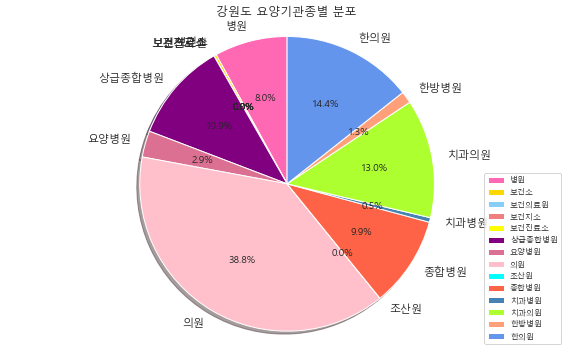

In [31]:
# 서울특별시
kw = df2_groupby[('장비수','서울특별시')]

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
labels = kw.index
sizes = kw.values
colors = ['hotpink', 'gold', 'lightskyblue', 'lightcoral','yellow','purple','palevioletred',
         'pink','cyan','tomato','steelblue','greenyellow','lightsalmon','cornflowerblue']
ax.pie(sizes,colors=colors, shadow=True, startangle=90,autopct='%1.1f%%',labels=labels)
ax.legend( labels, loc= 'lower right', fontsize = 8)
ax.axis('equal')
ax.set_title('강원도 요양기관종별 분포')
plt.show()

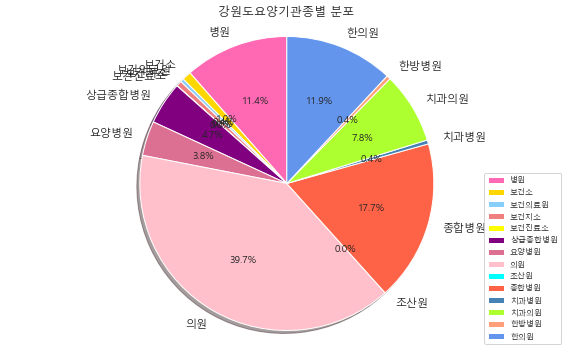

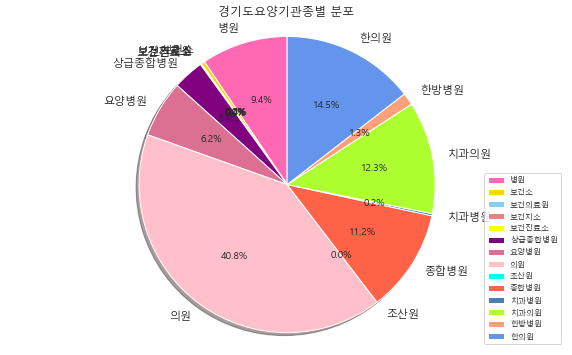

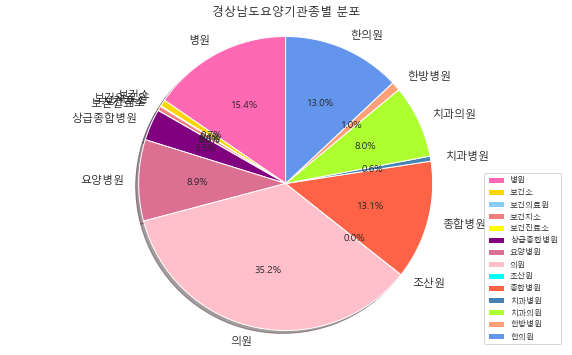

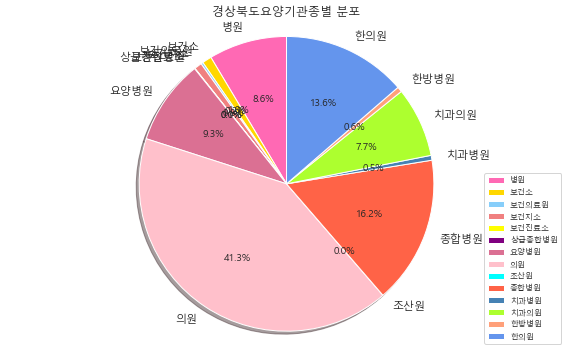

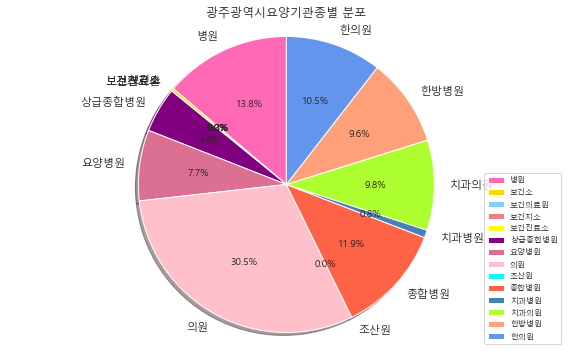

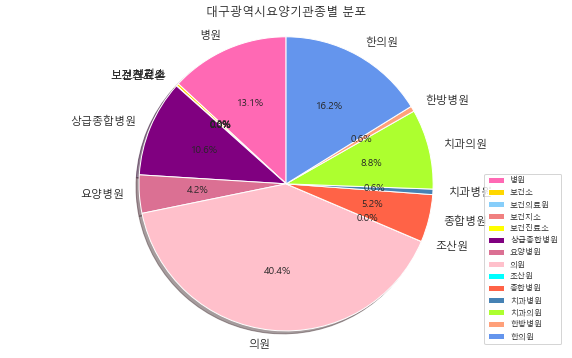

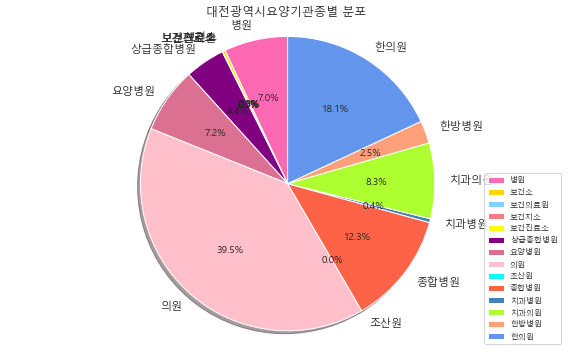

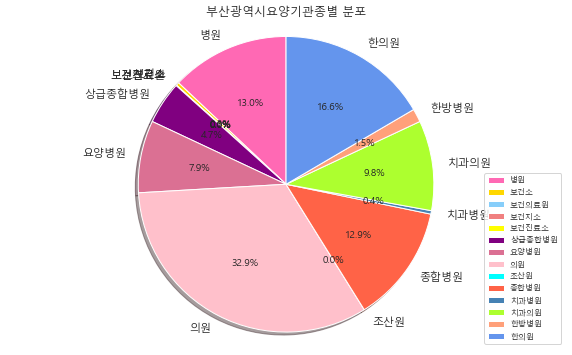

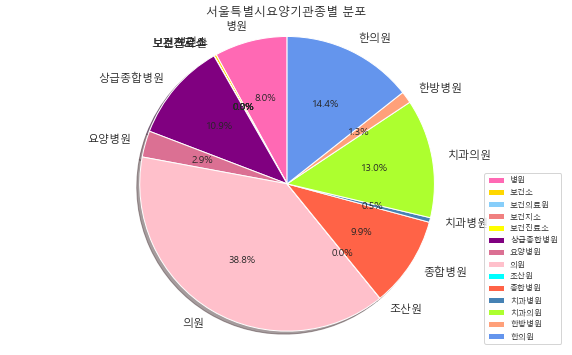

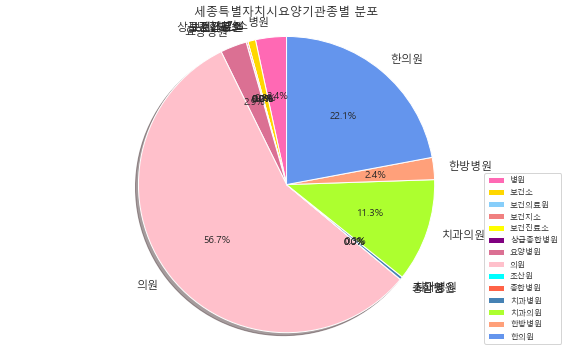

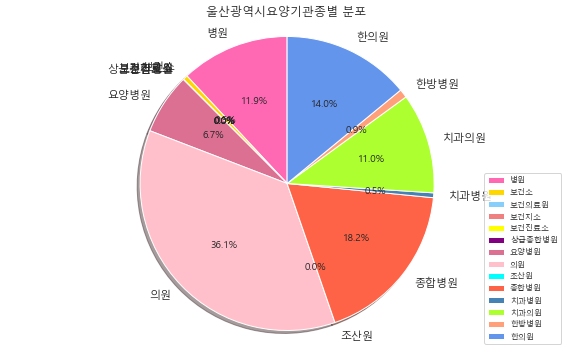

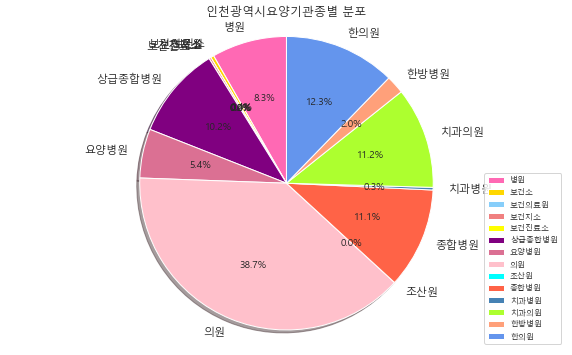

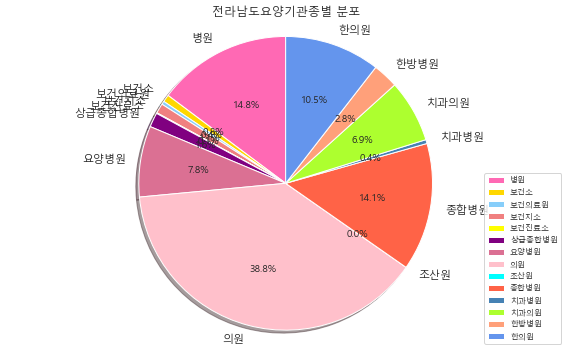

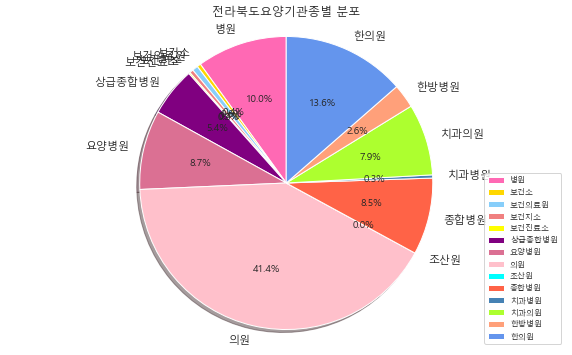

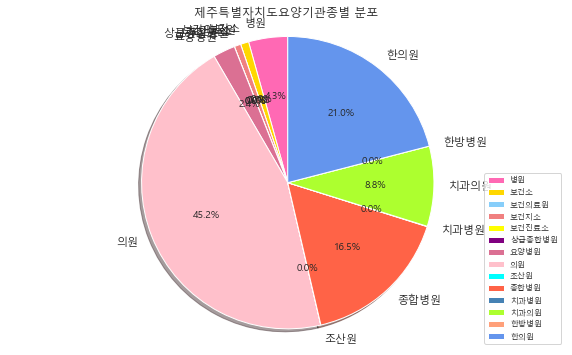

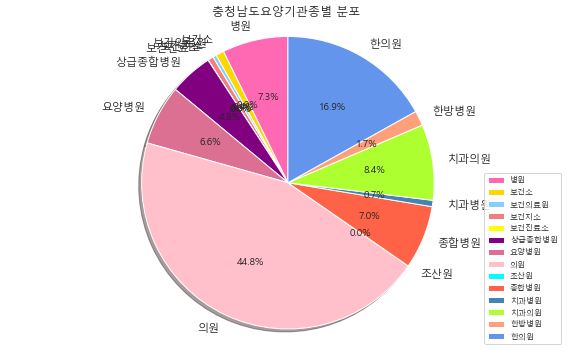

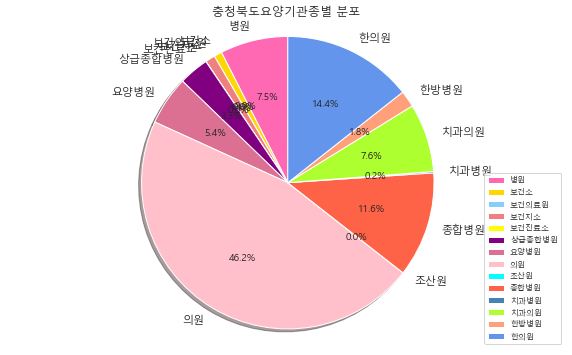

In [32]:
# 전국 병원 분포 알아보기
df2_loc_list = list(map(lambda x: x[1] ,df2_groupby.columns))

for i in df2_loc_list:
    kw = df2_groupby[('장비수',i)]

    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
    labels = kw.index
    sizes = kw.values
    colors = ['hotpink', 'gold', 'lightskyblue', 'lightcoral','yellow','purple','palevioletred',
             'pink','cyan','tomato','steelblue','greenyellow','lightsalmon','cornflowerblue']
    ax.pie(sizes,colors=colors, shadow=True, startangle=90,autopct='%1.1f%%',labels=labels)
    ax.legend( labels, loc= 'lower right', fontsize = 8)
    ax.axis('equal')
    ax.set_title(str(i)+ '요양기관종별 분포')
    plt.show()

## 5.2. 지역별 상급종합병원, 종합병원 수 살펴보기

In [33]:
df2_groupby.loc[['종합병원','상급종합병원'],]

장비수                                                           \
시도         강원도      경기도    경상남도    경상북도   광주광역시   대구광역시   대전광역시   부산광역시   
요양기관종별                                                                    
종합병원    4614.0  20254.0  7397.0  7131.0  4092.0  2727.0  4074.0  8817.0   
상급종합병원  1222.0   6075.0  1957.0     0.0  1698.0  5531.0  1442.0  3186.0   

                                                                         \
시도        서울특별시 세종특별자치시   울산광역시   인천광역시    전라남도    전라북도 제주특별자치도    충청남도   
요양기관종별                                                                    
종합병원    19140.0     0.0  3256.0  5141.0  5355.0  3445.0  1997.0  2453.0   
상급종합병원  21020.0     0.0     0.0  4721.0   604.0  2192.0     0.0  1675.0   

                
시도        충청북도  
요양기관종별          
종합병원    3452.0  
상급종합병원   984.0

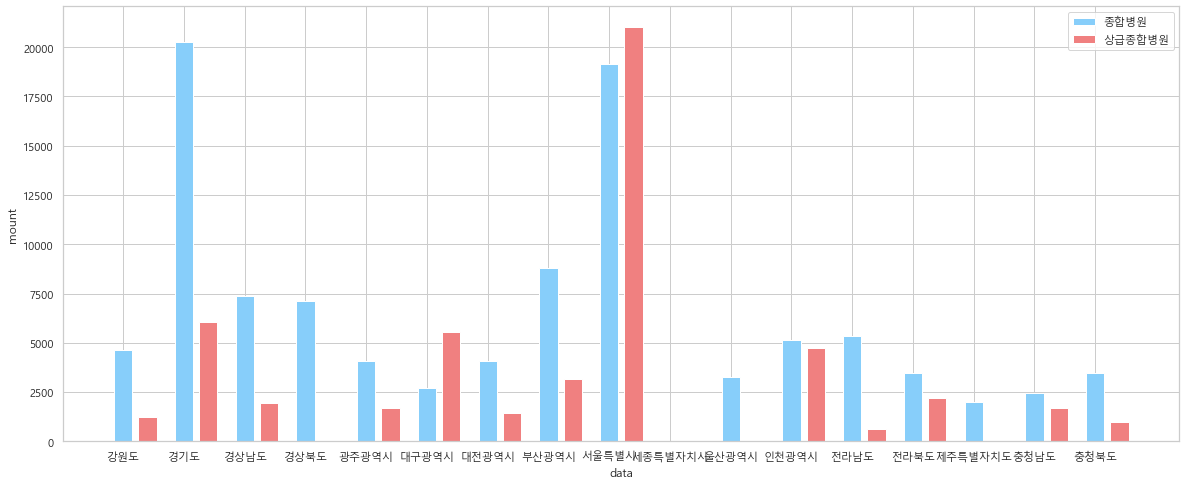

In [34]:
x = np.arange(17)
xticts = tuple(str(x[1]) for x in df2_groupby.columns)

y1 = df2_groupby.loc['종합병원',]
y2 = df2_groupby.loc['상급종합병원']

plt.figure(figsize=(20,8))
plt.bar(x,y1, color='lightskyblue' ,  width = 0.3, alpha = 1, label='종합병원')
plt.bar(x+0.4, y2, color='lightcoral', width = 0.3, alpha=1,label='상급종합병원')
plt.xlabel('data')
plt.ylabel('mount')
plt.legend()

plt.xticks(x, xticts)    # set the locations and labels of the xticks
plt.show()